In [ ]:
!pip install pycountry

In [25]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data
players = pd.read_csv('../input/world-volleyball-data-players-teams-and-more/players.csv')
teams = pd.read_csv('../input/world-volleyball-data-players-teams-and-more/teams.csv')

In [26]:
import pycountry

def get_country_name(code):
    try:
        name = pycountry.countries.get(alpha_2=code).name
    except:
        name = None
    return name

# Volleyball Positions

## 1. Setter : 
 The setter is responsible for setting the ball for hitters to attack. They are often considered 
the playmakers of the team, as they need excellent decision-making skills and precise ball placement to create scoring opportunities

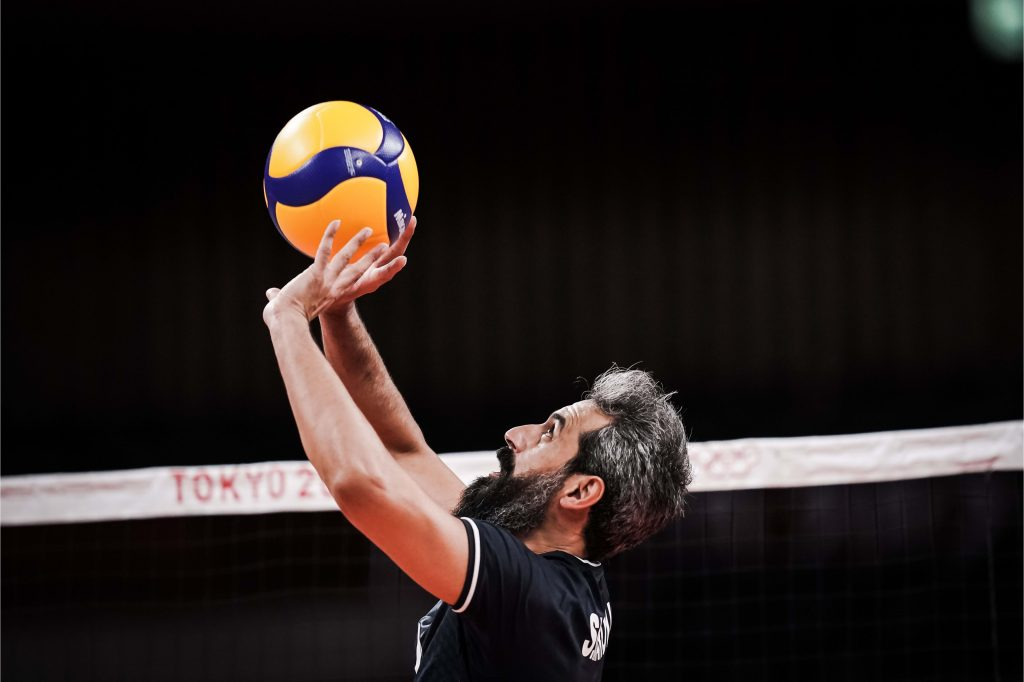

## 2. Outside Hitter : 
Also known as left-side hitters, outside hitters primarily attack from the left side of the court. They are versatile players who receive serves, play defense, and participate in blocking.

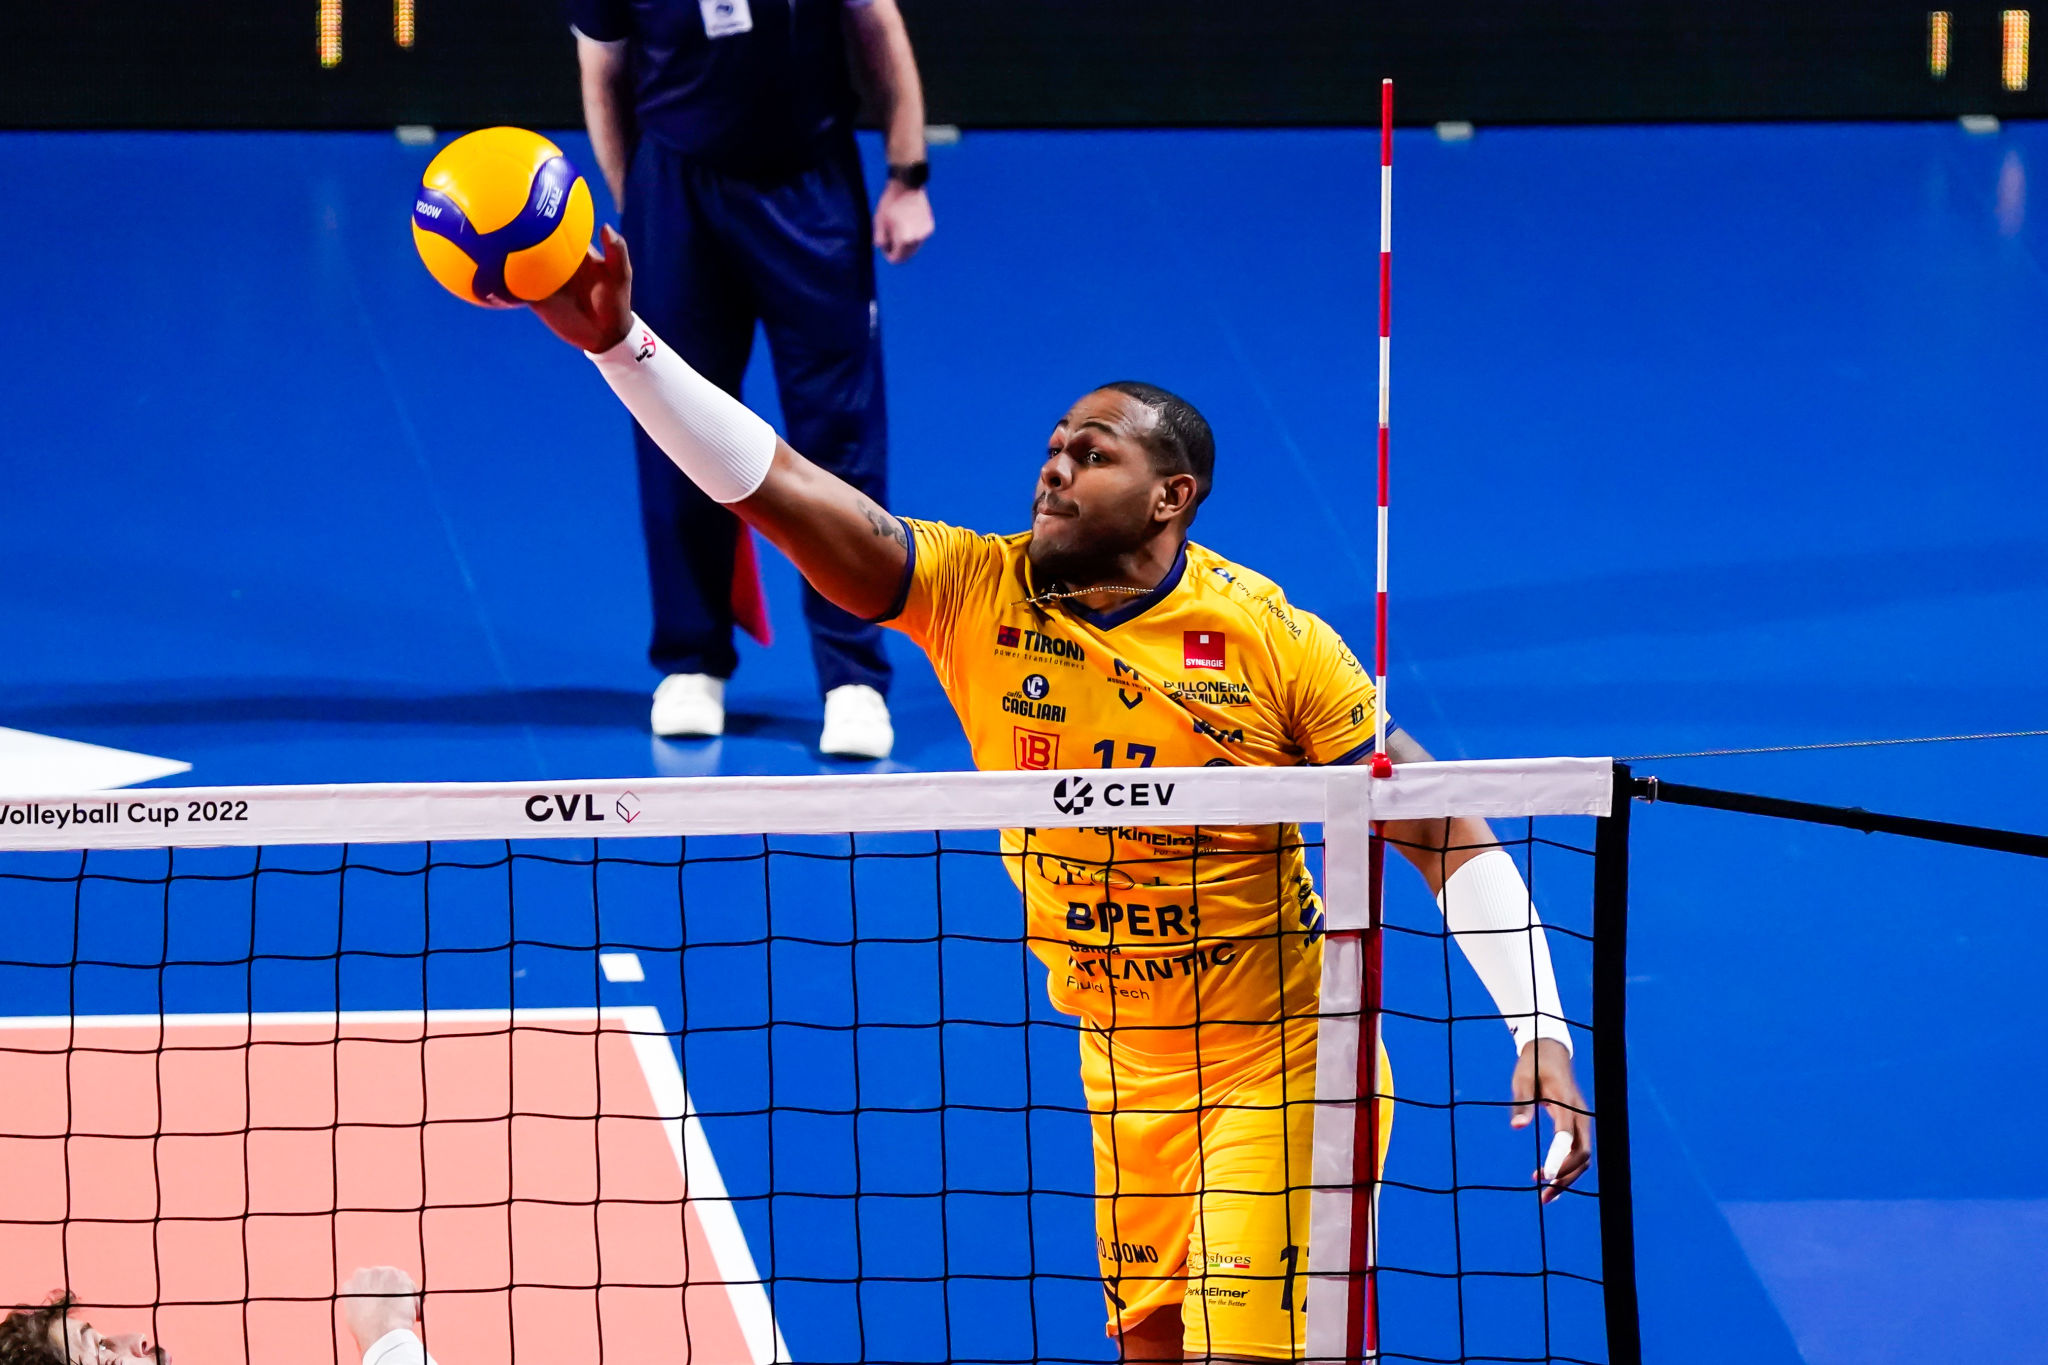

## 3. Universal : 
A player that can play in every positions


## 4. Opposite Hitter : 
The opposite hitter, also known as the right-side hitter, plays opposite the setter. They are usually responsible for strong attacks from the right side of the court and often participate in blocking.

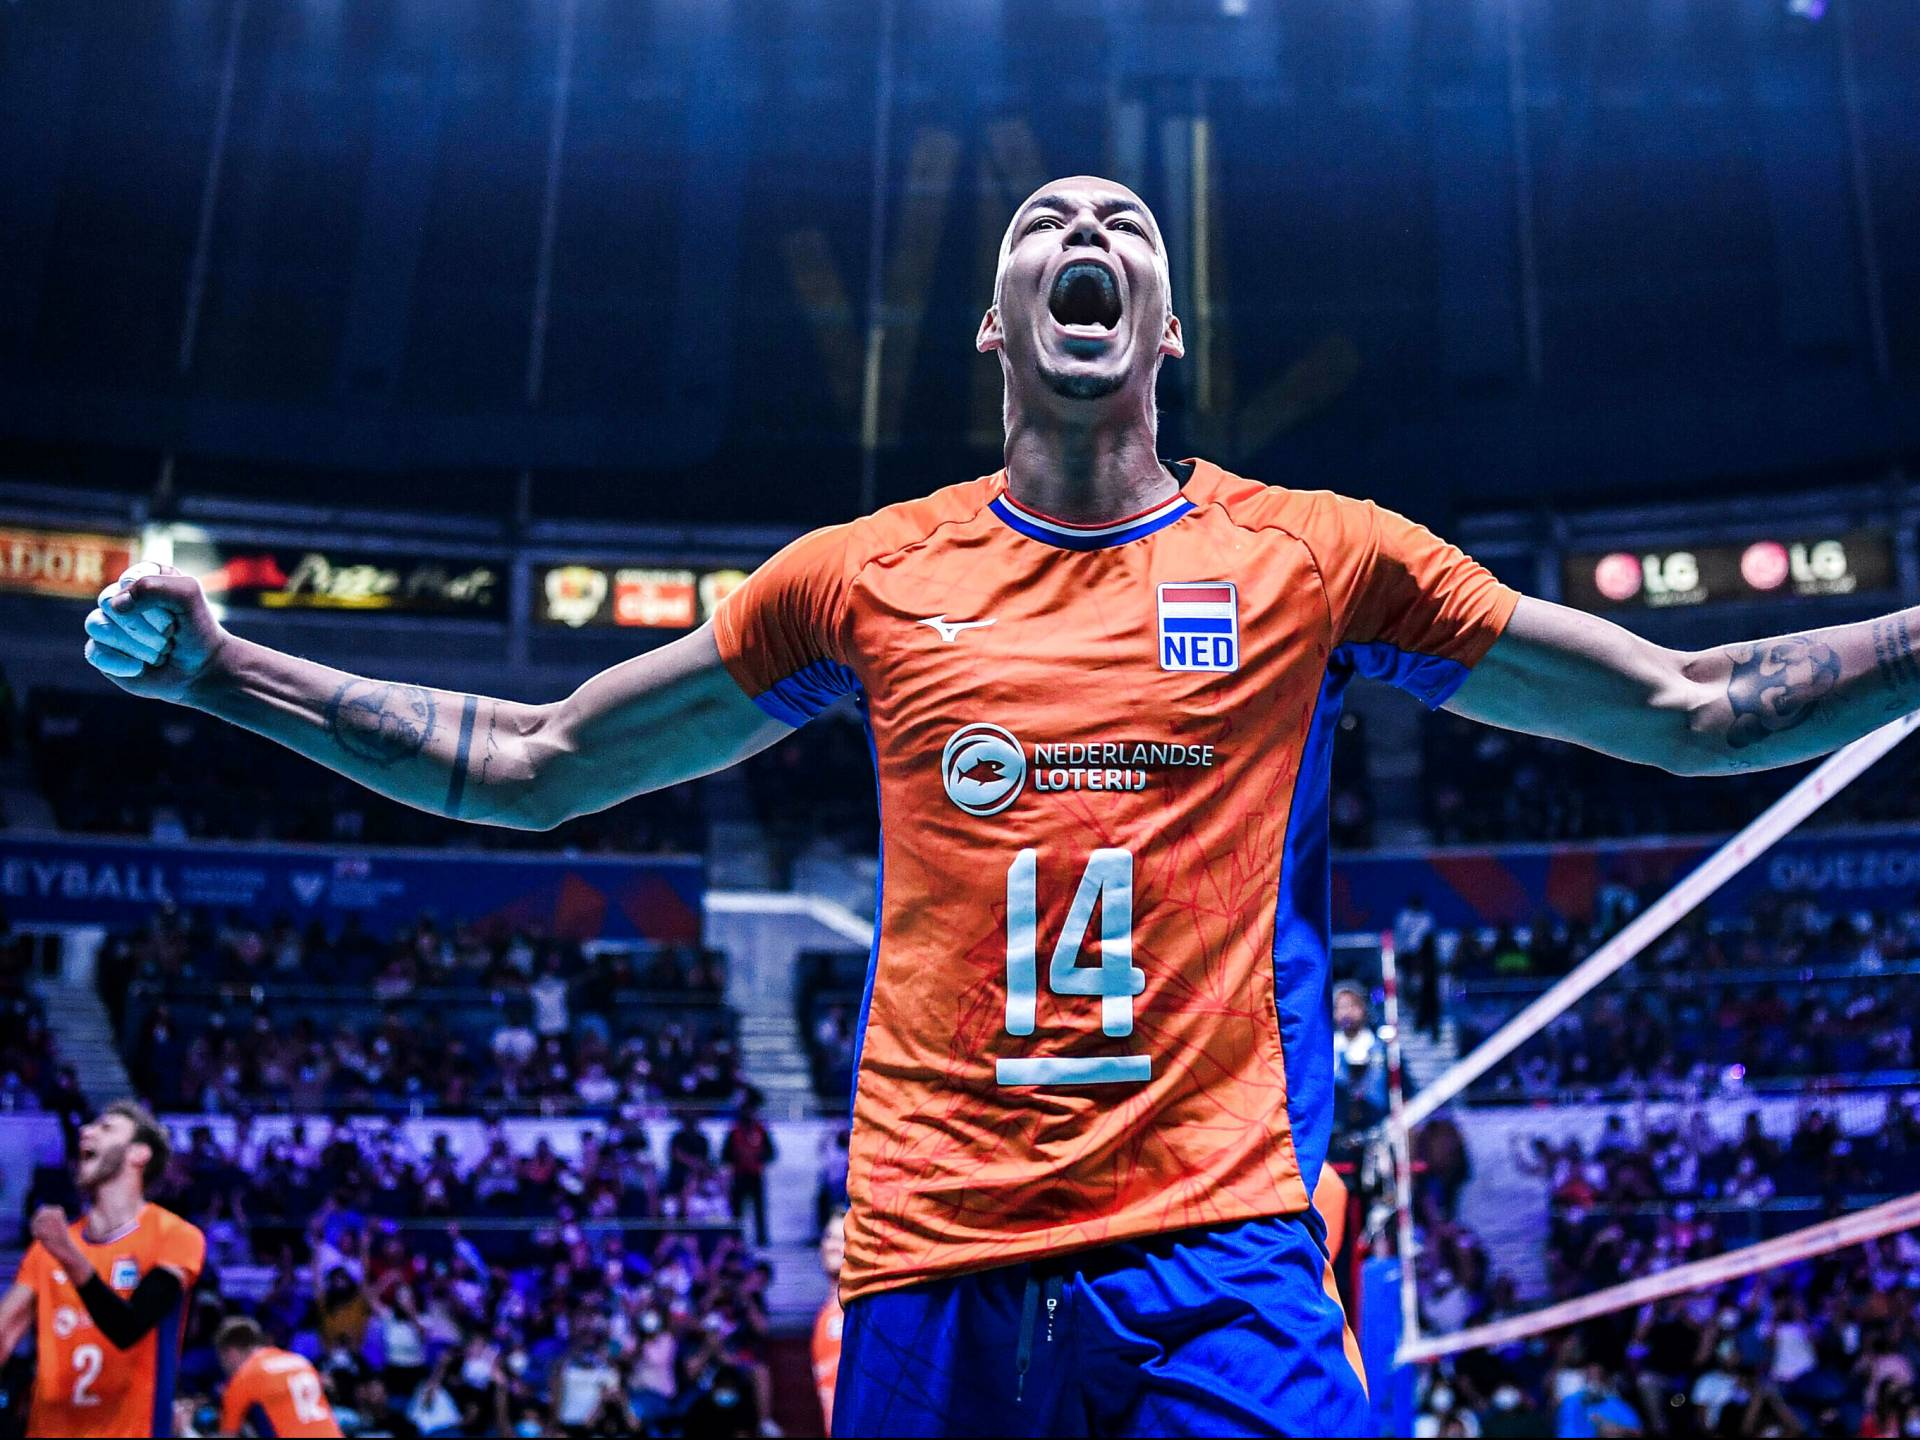

## 5. Libero : 
The libero is a specialized defensive player who wears a different colored jersey. They are exceptional at passing and digging, and they play a crucial role in keeping the ball in play during rallies. Liberos cannot perform overhead attacks.

# Distribution of positions in the world map

<div style="border-radius:10px;
            border : #101820 solid;
            background-color:#101820;
            letter-spacing:0.5px;
            text-align: center">

<h2 style="padding: 10px;
           color:#99F443;
           text-align:center;
           font-family: Cursive;
           font-size:180%;">
Visualizing the distribution of positions in the world map
</h2>

<p style="padding: 10px;
           color:#FEE715;
           text-align:center;
           line-height:1.5;
           font-family: Cursive;
           font-size:140%;">
In this part of the notebook, we're working on visualizing the distribution of volleyball player positions across the globe. We'll be using the GeoPandas library to create a geographic plot, allowing us to observe any geographical trends in player positions.
</p>

</div>

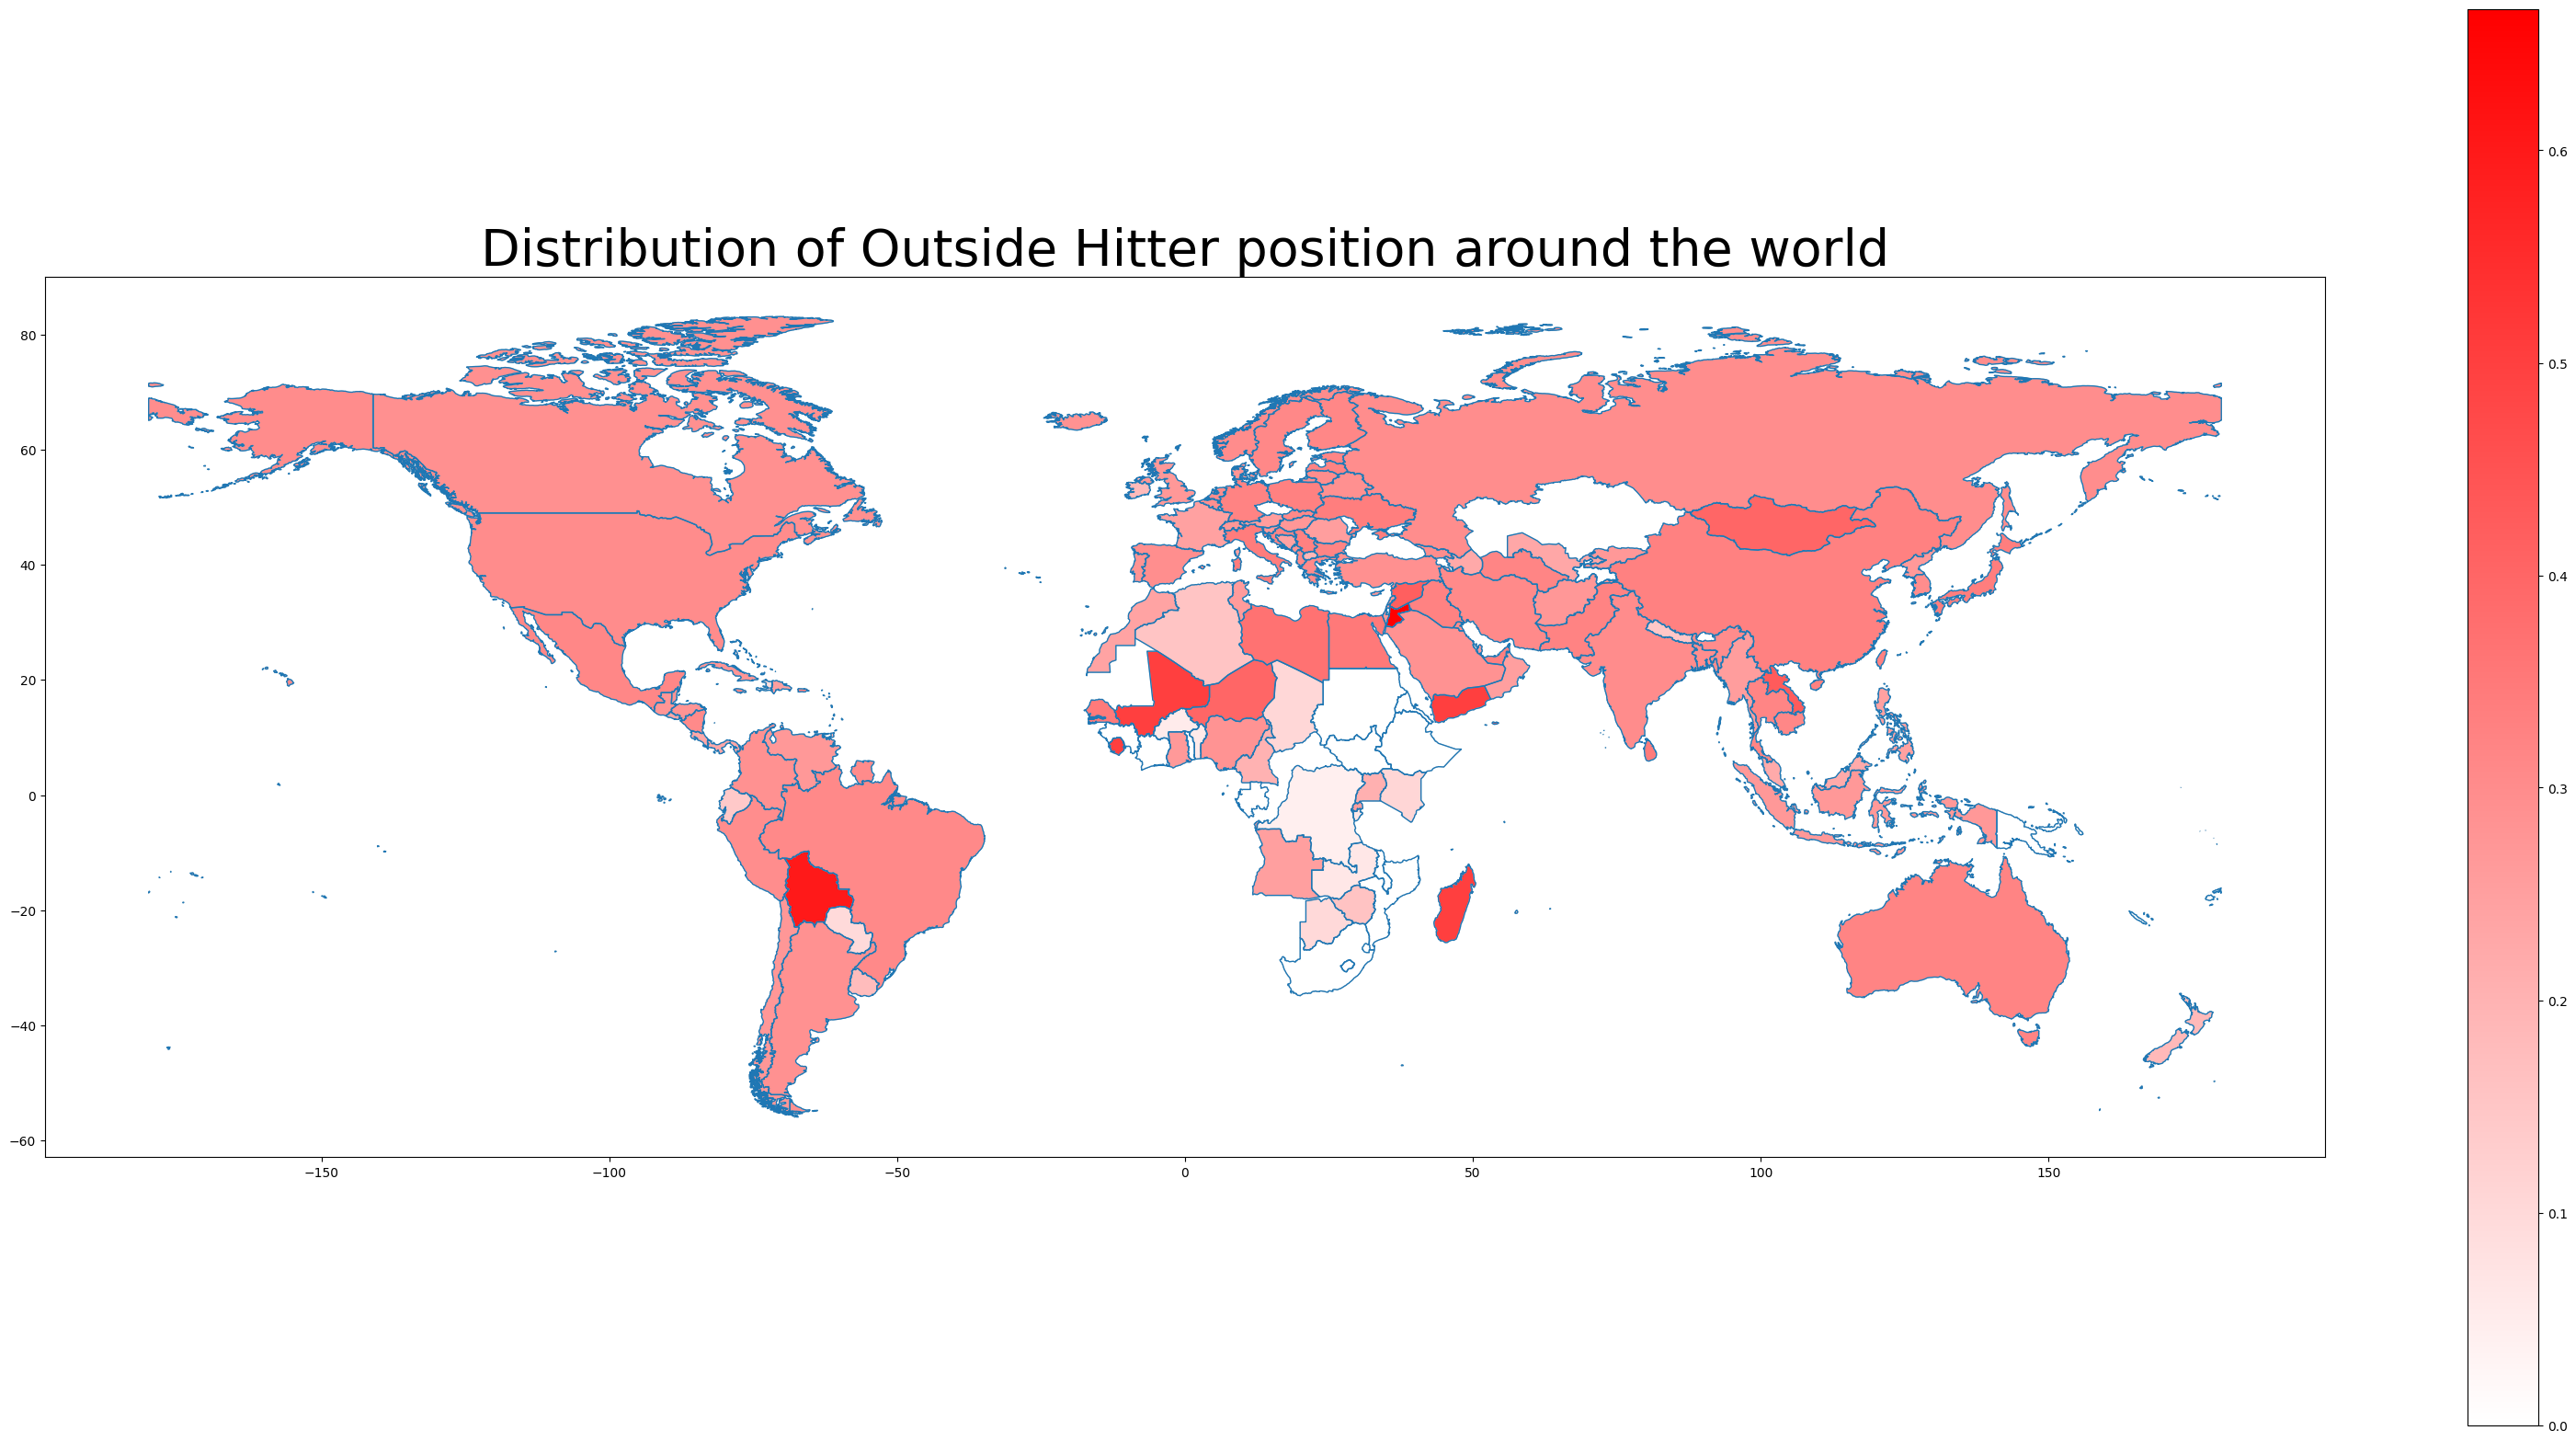

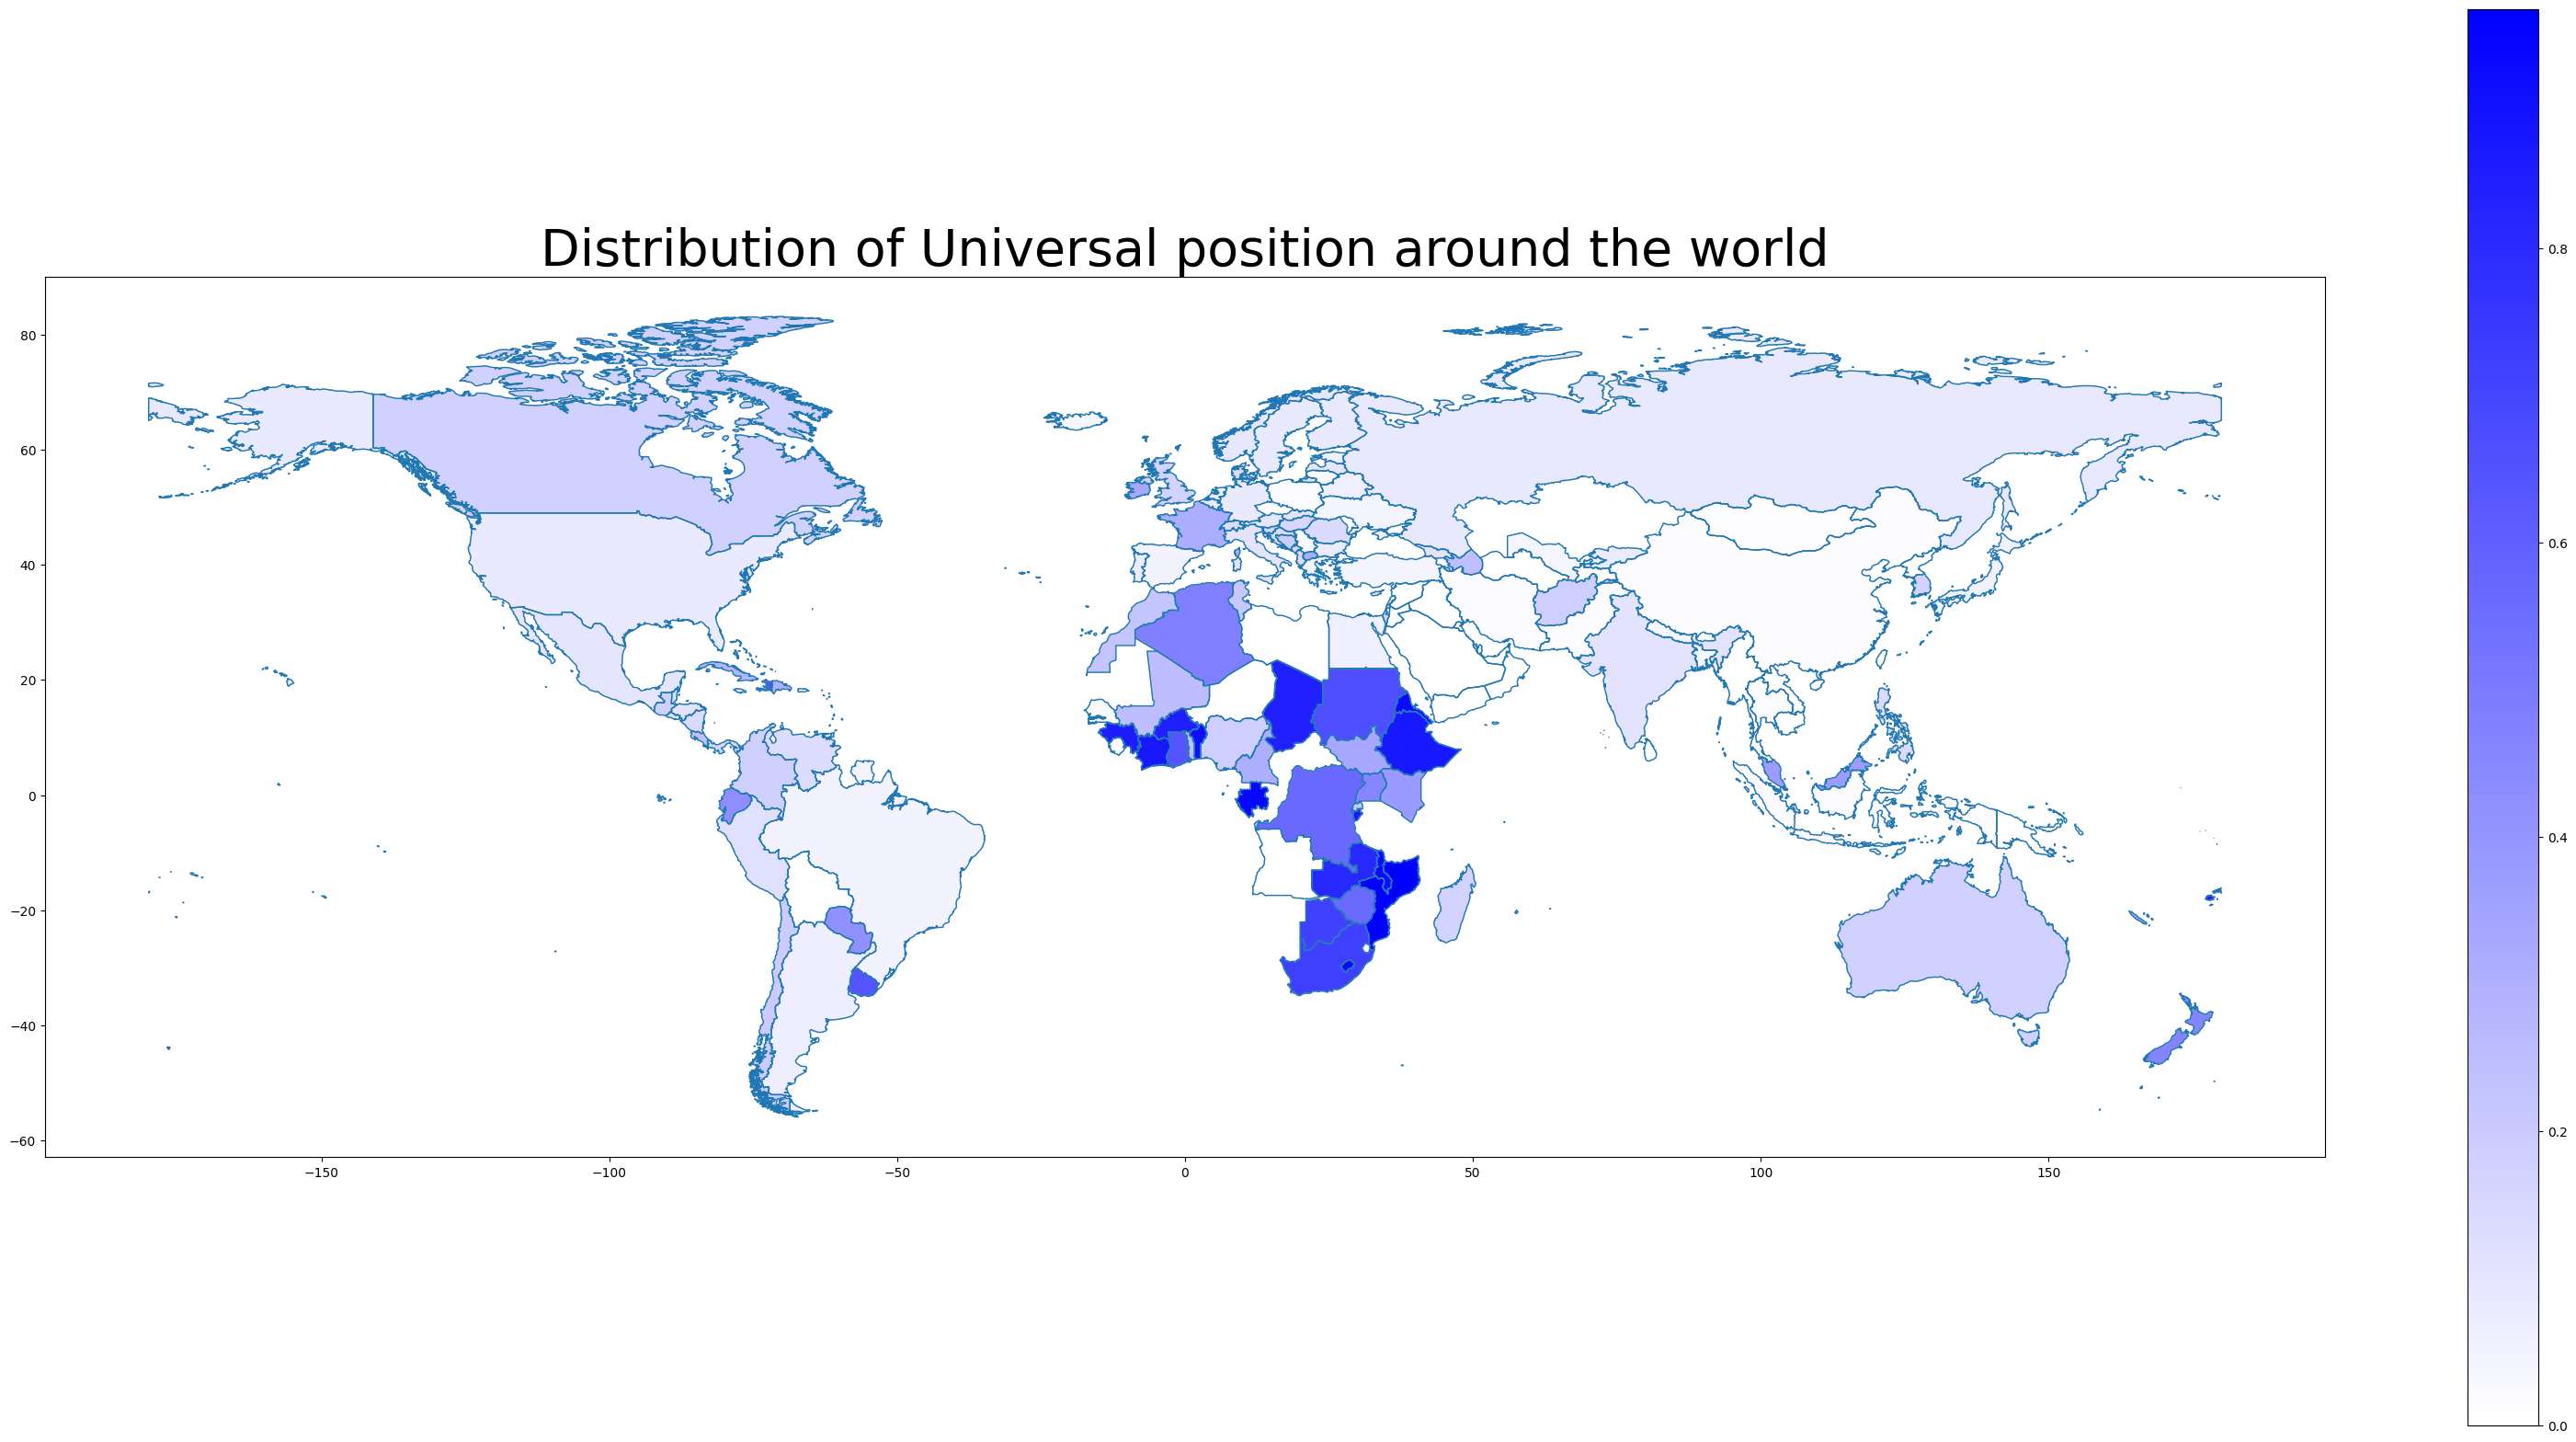

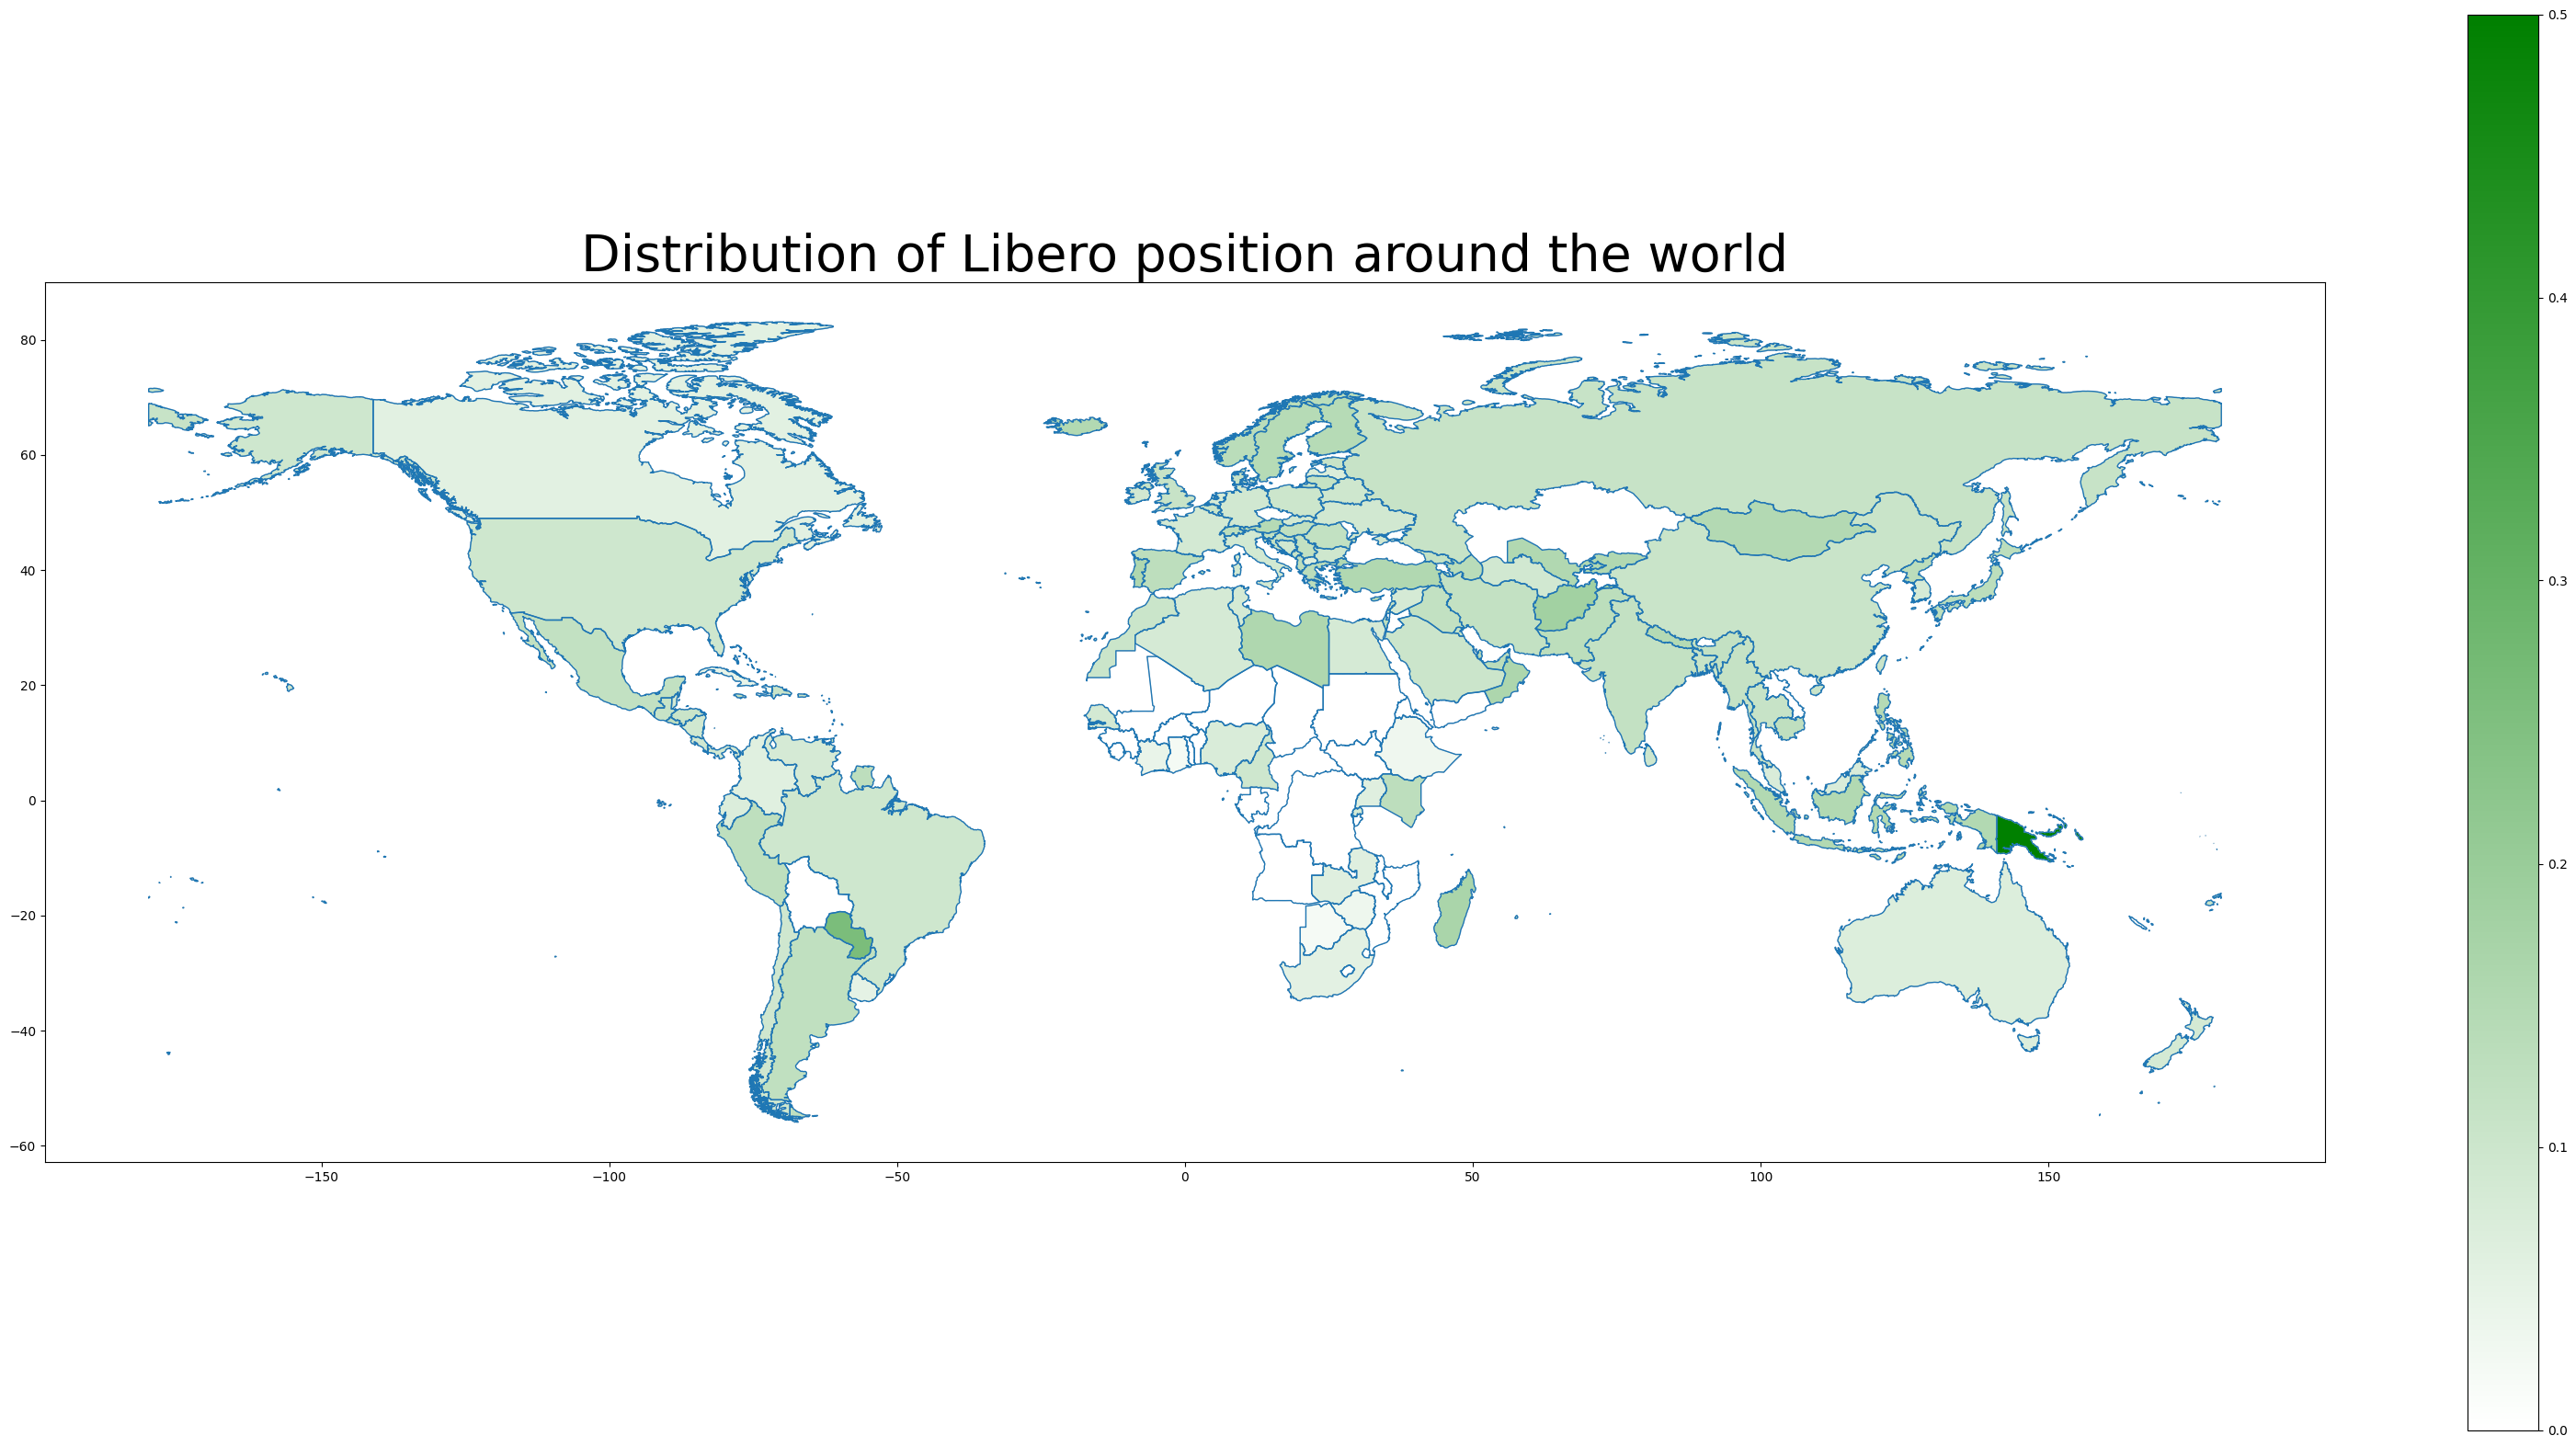

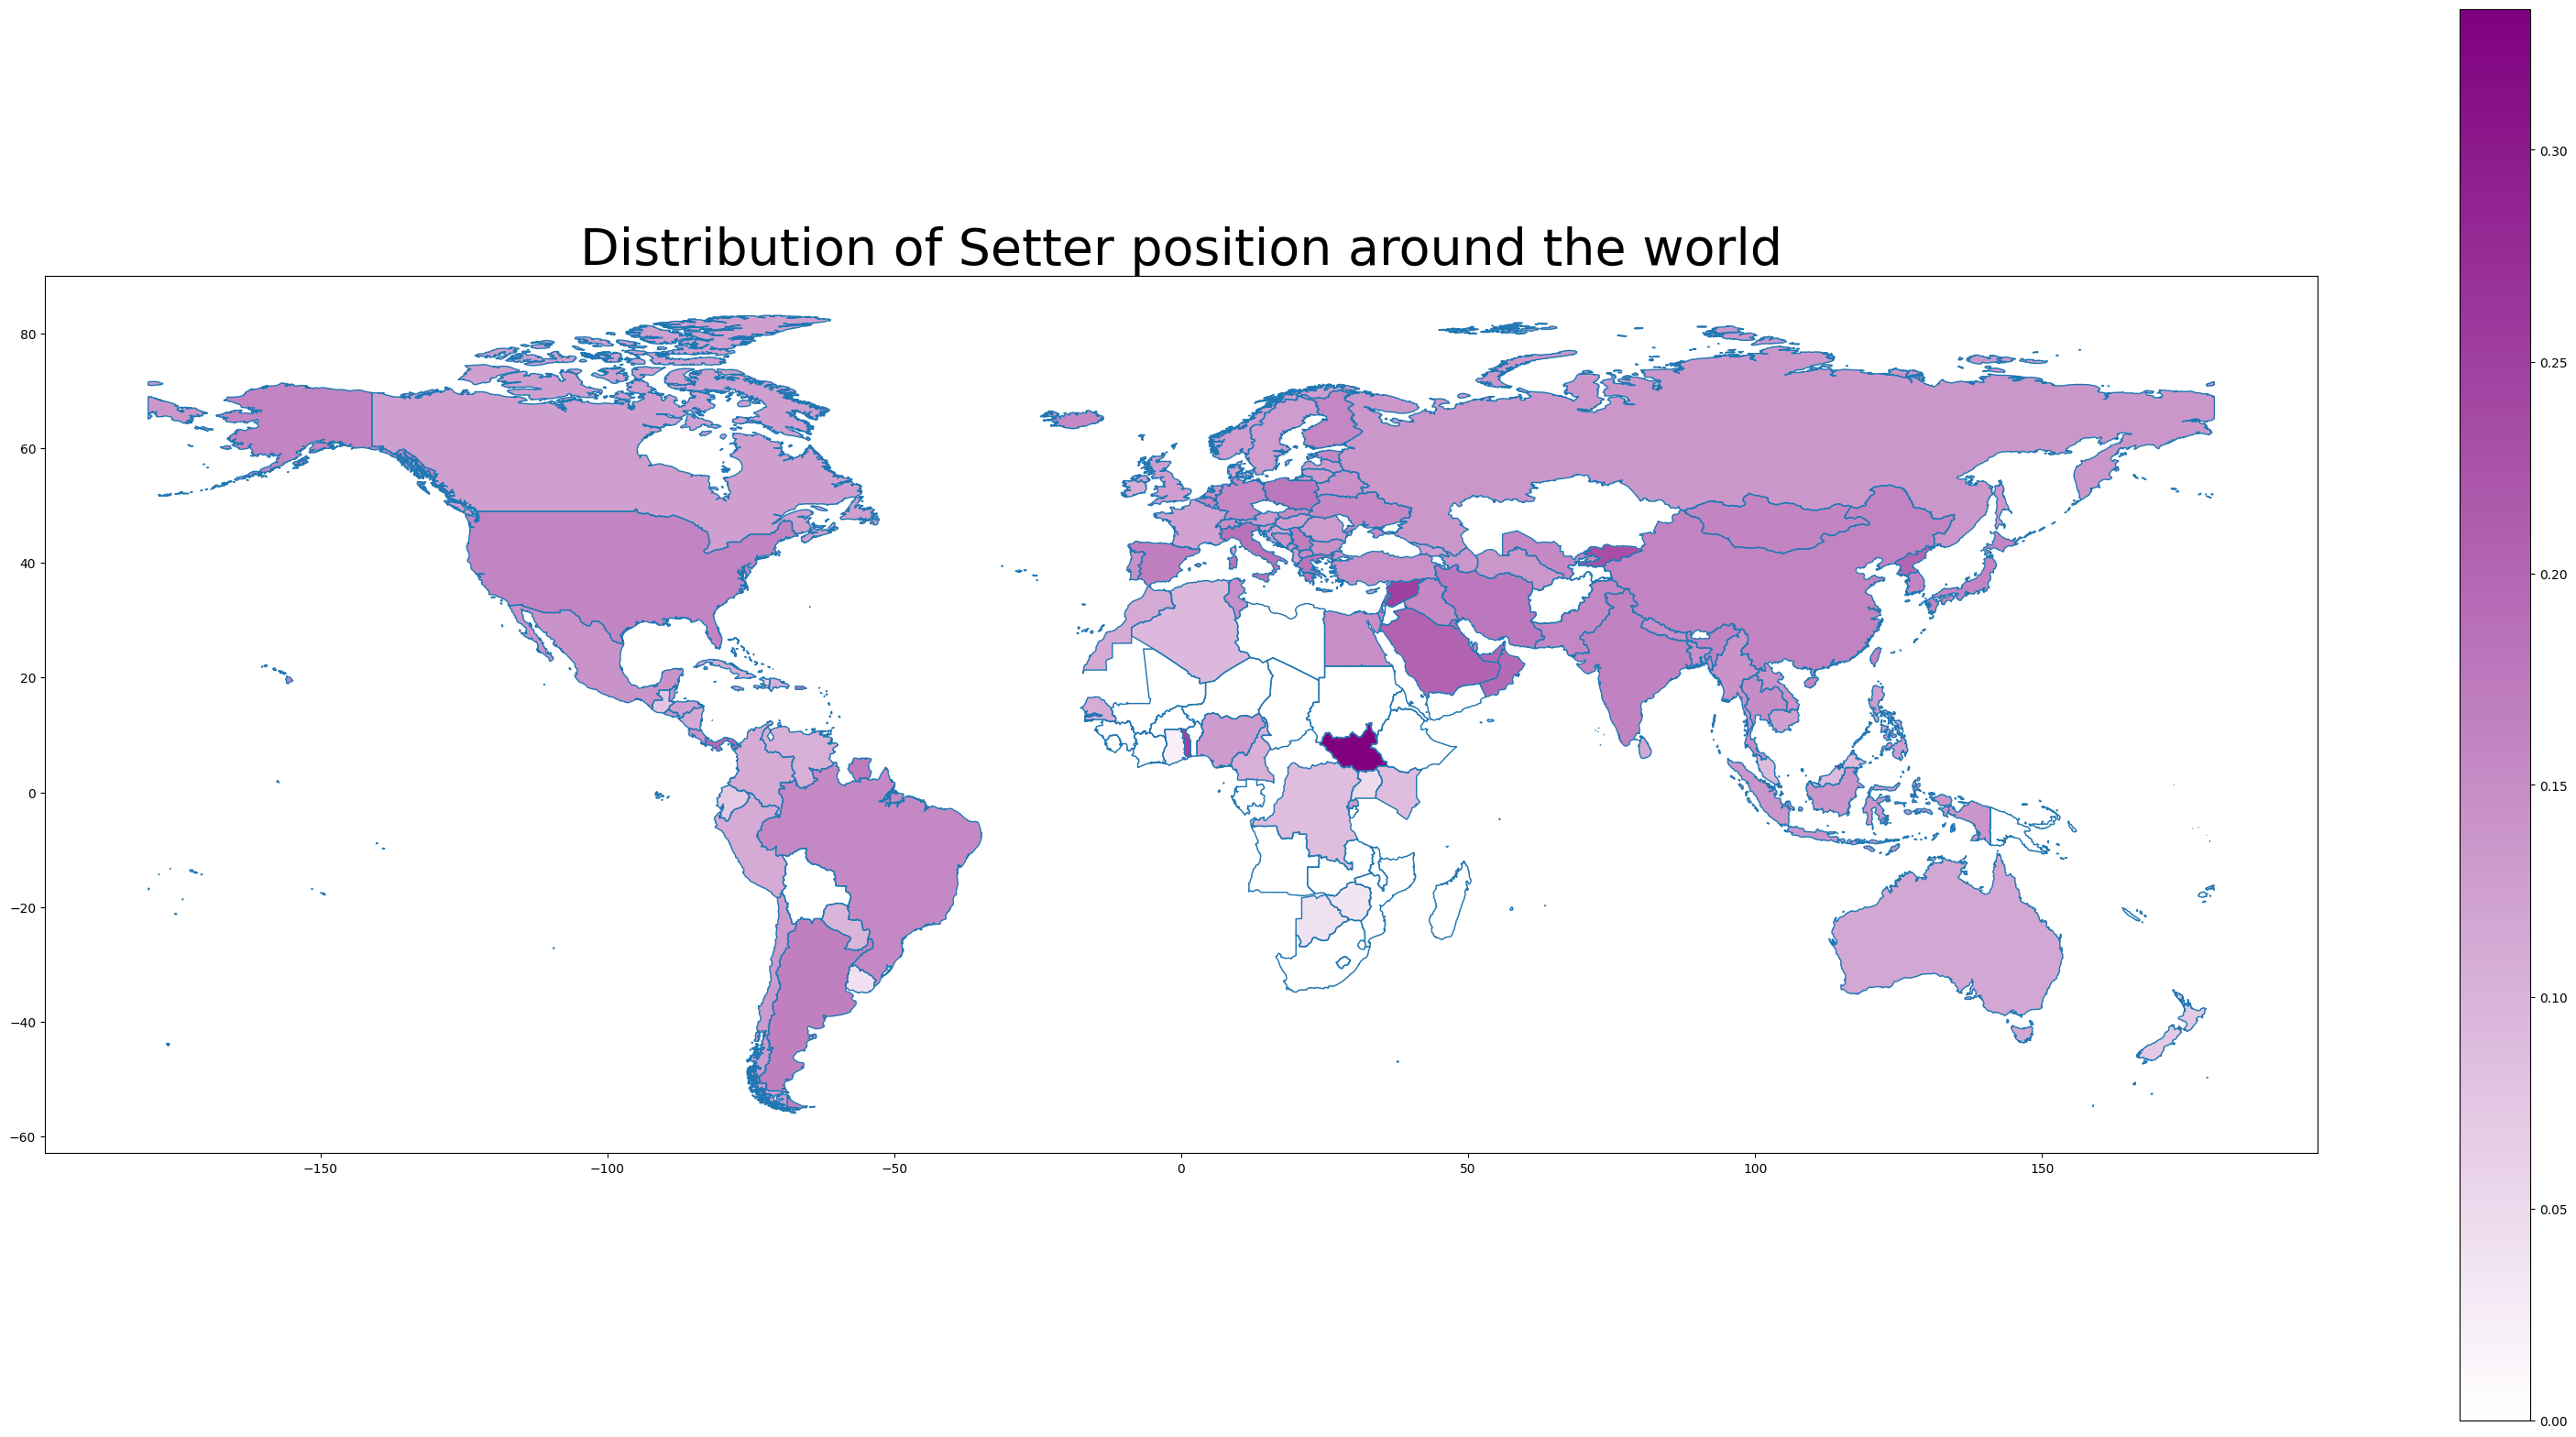

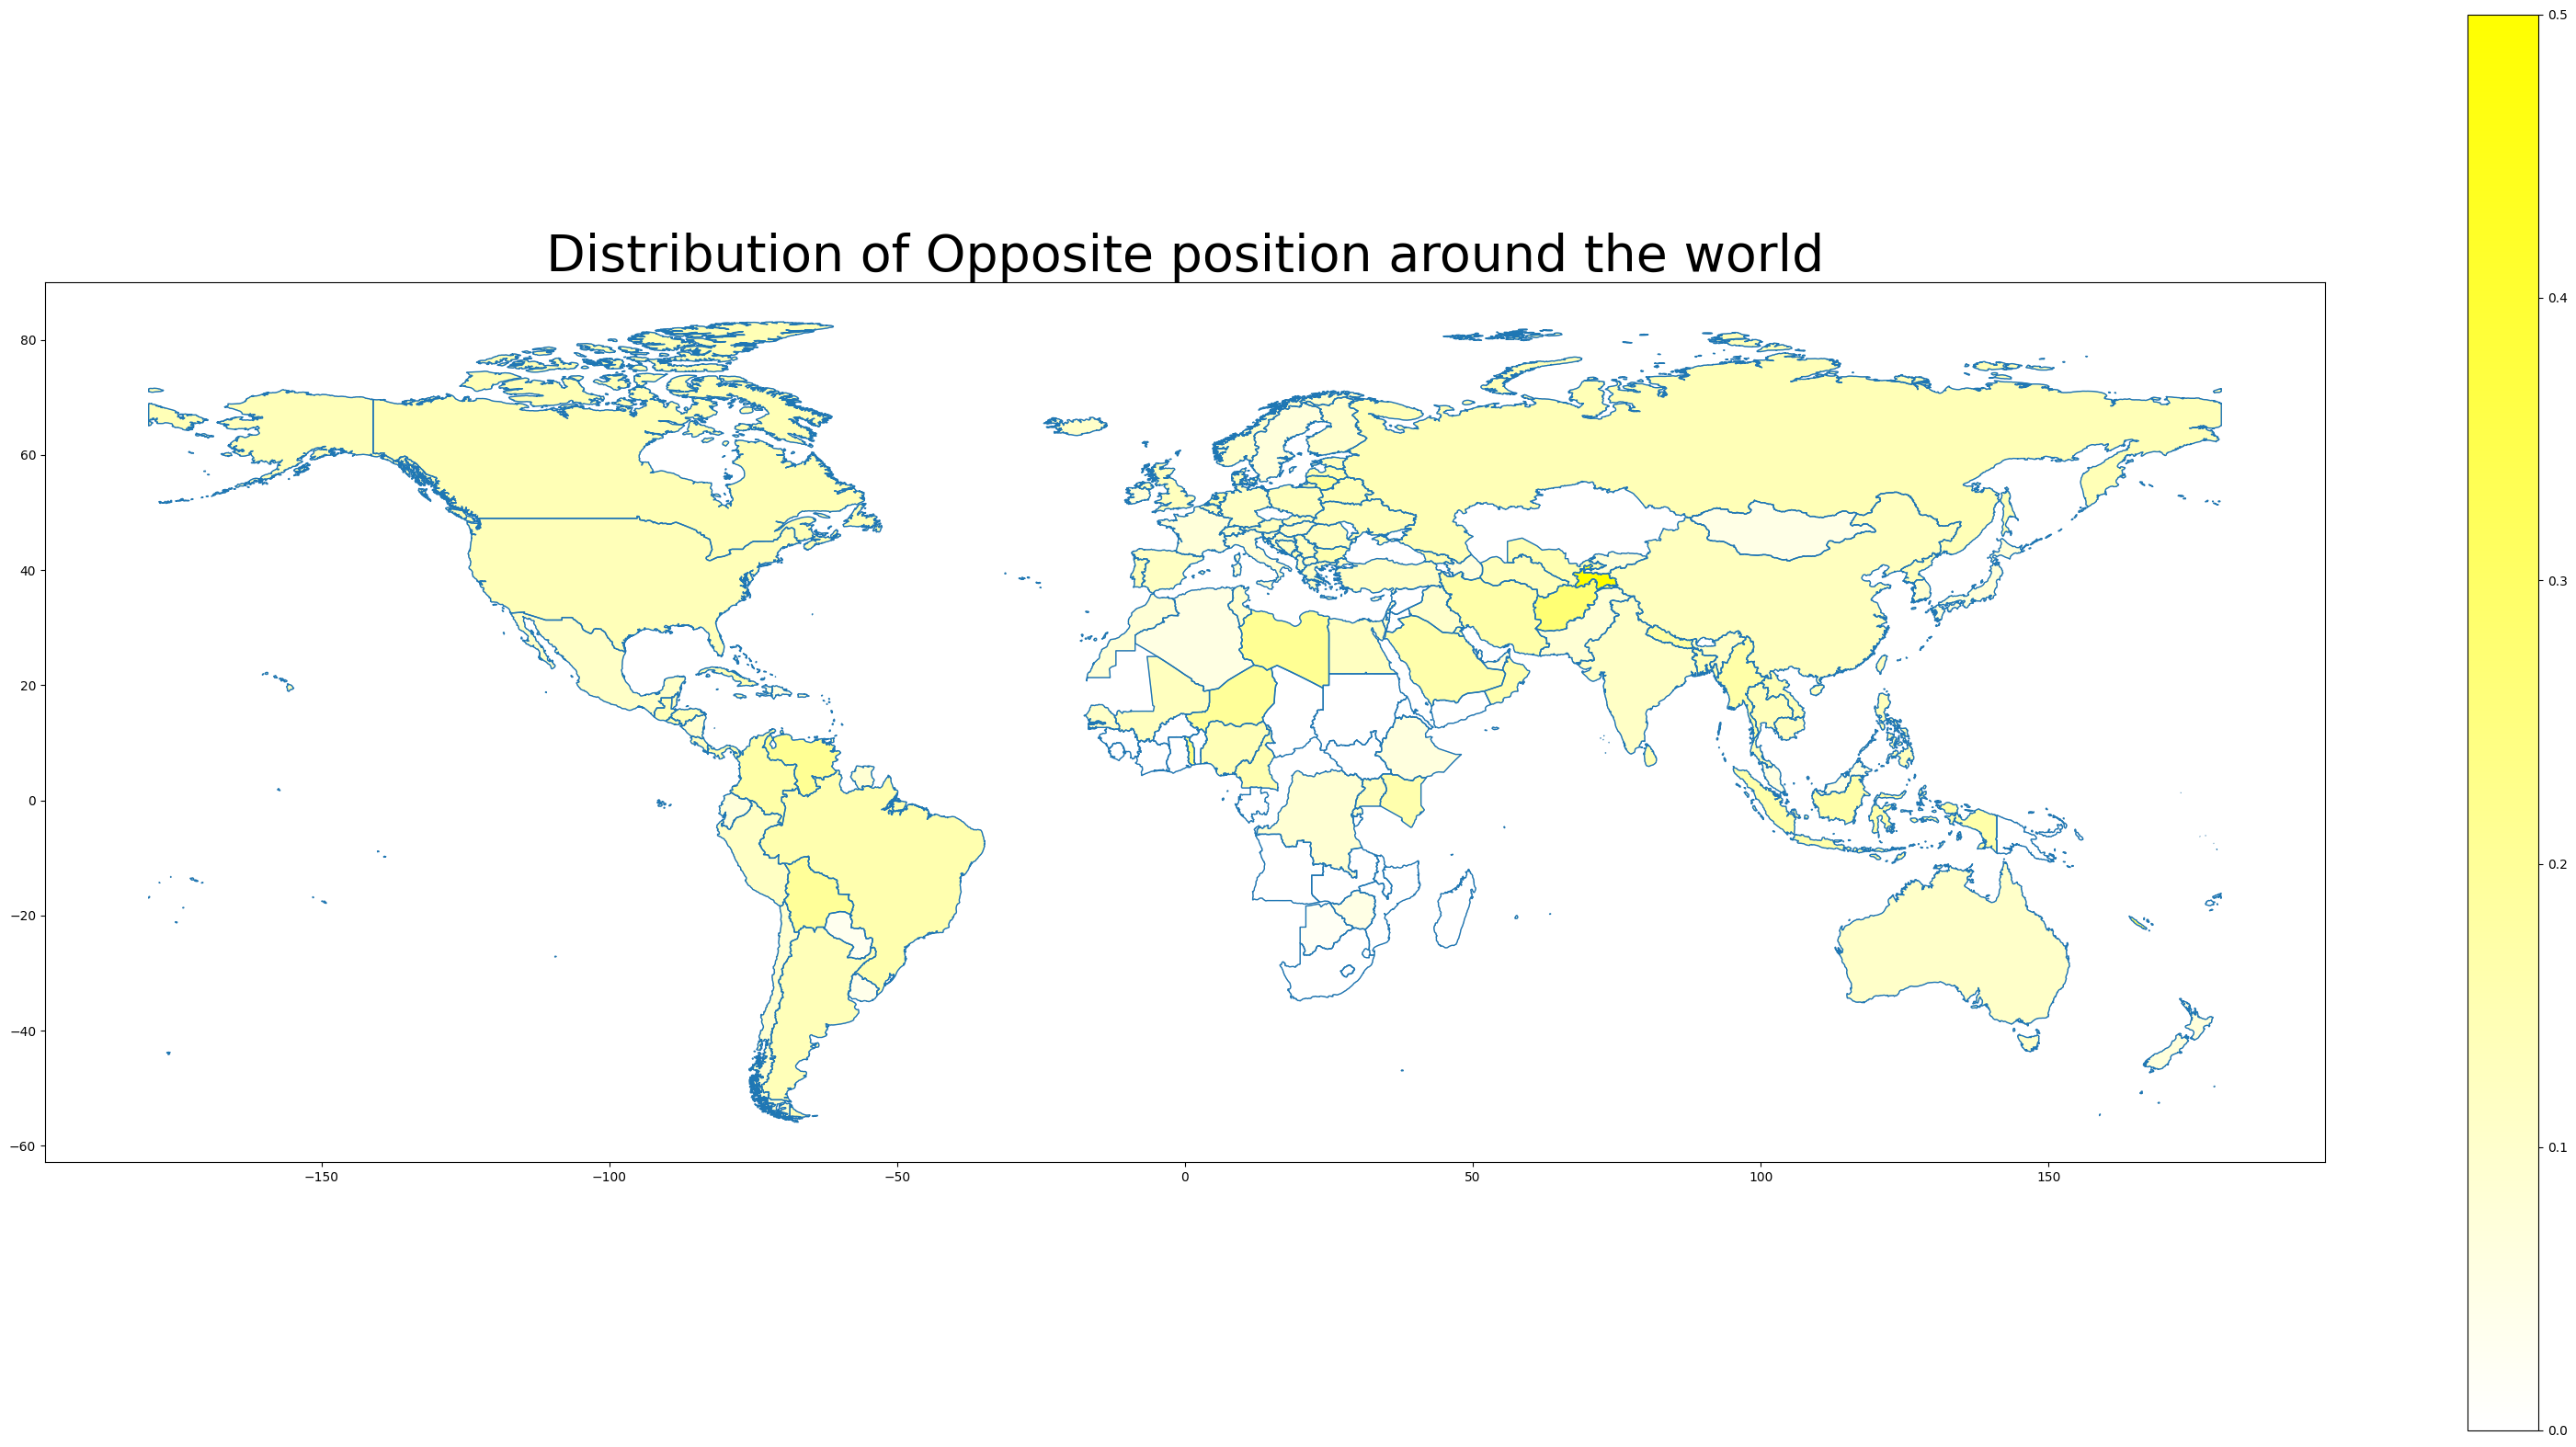

In [27]:
import geopandas as gpd
from matplotlib.colors import LinearSegmentedColormap

# Convert country codes to country names in the players DataFrame
players['country_name'] = players['country_code'].apply(get_country_name)

# Count the number of players in each position for each country
position_counts = players.groupby(['country_code', 'position']).size().unstack(fill_value=0)

# Calculate the proportion of each position for each country
position_proportions = position_counts.div(position_counts.sum(axis=1)+1, axis=0)

# Load a GeoDataFrame with the geometry of each country from your shapefile
world = gpd.read_file('../input/world-map/World_Countries__Generalized_.shp')

# Merge the GeoDataFrame with the proportions
world = world.merge(position_proportions, left_on='ISO', right_index=True)

# Create a colormap
colormaps = {
    'Outside Hitter': LinearSegmentedColormap.from_list('mycmap', ['white', 'red']),
    'Universal': LinearSegmentedColormap.from_list('mycmap', ['white', 'blue']),
    'Libero': LinearSegmentedColormap.from_list('mycmap', ['white', 'green']),
    'Setter': LinearSegmentedColormap.from_list('mycmap', ['white', 'purple']),
    'Opposite': LinearSegmentedColormap.from_list('mycmap', ['white', 'yellow']),
}

# Plot the maps
positions = ['Outside Hitter', 'Universal', 'Libero', 'Setter', 'Opposite']
for position in positions:
    fig, ax = plt.subplots(1, 1, figsize=(40, 20))
    world.boundary.plot(ax=ax, linewidth=1)
    world.plot(column=position, legend=True, cmap=colormaps[position], linewidth=0.8, ax=ax, edgecolor='0.8')
    plt.title(f'Distribution of {position} position around the world', fontsize=40)
    plt.show()

In [28]:
# Display the first few rows of the dataframe
print("First few rows of players data:")
players.head()

First few rows of players data:


player_id                     name  ranking  weight        position  height  \
0        p1             Enea Xhelati   2659.0    91.0        Opposite   200.0   
1       p10  Demián González TOP 200    159.0    81.0          Setter   192.0   
2      p100           Wannes Rosiers      NaN    86.0        Opposite   201.0   
3     p1000           Ivan Borovnjak   1902.0    88.0  Outside Hitter   200.0   
4    p10000          Szymon Kostecki      NaN     NaN  Outside Hitter   190.0   

  country_code  birthdate country_name  
0          NaN  5/15/1982         None  
1           AR  2/21/1983    Argentina  
2           BE  6/22/1985      Belgium  
3           RS   7/4/1989       Serbia  
4           PL  9/23/1981       Poland

In [29]:
print("\nFirst few rows of teams data:")
teams.head()


First few rows of teams data:


team_id         team_name country_code  n_matches  n_tournaments      town  \
0  t10001       TSV Reinbek           DE          0              0   Reinbek   
1  t10016         Molde VBK           NO          0              0     Molde   
2  t10017          Al-Salam           SA          0              4     Qatif   
3  t10018        AZS Kraków           PL          0             14    Kraków   
4  t10019  Spójnia Warszawa           PL          0              3  Warszawa   

  founded  
0      \r  
1      \r  
2      \r  
3      \r  
4    1949

<div style="border-radius:10px;
            border : #101820 solid;
            background-color:#101820;
            letter-spacing:0.5px;
            text-align: center">

<h2 style="padding: 10px;
           color:#99F443;
           text-align:center;
           font-family: Cursive;
           font-size:180%;">
Visualizing the Heights of the Tallest Volleyball Players Across Countries
</h2>

<p style="padding: 10px;
           color:#FEE715;
           text-align:center;
           line-height:1.5;
           font-family: Cursive;
           font-size:140%;">
In this section, we take a closer look at the heights of volleyball players from various countries.<br><br>
Particularly, we focus on the top 10 countries with the tallest players on average. To make the differences in height more visually pronounced, we have normalized the heights and represented each country's average height with a stick figure.<br><br>
The height of the stick figure corresponds to the normalized average height, while the actual average height is displayed above the figure. We have used a colormap to visually distinguish between the countries. <br><br>
The x-axis represents the countries, and the y-axis represents the normalized average heights of the players. This visual representation provides an interesting and intuitive way to compare the average player heights across different countries.
</p>

</div>

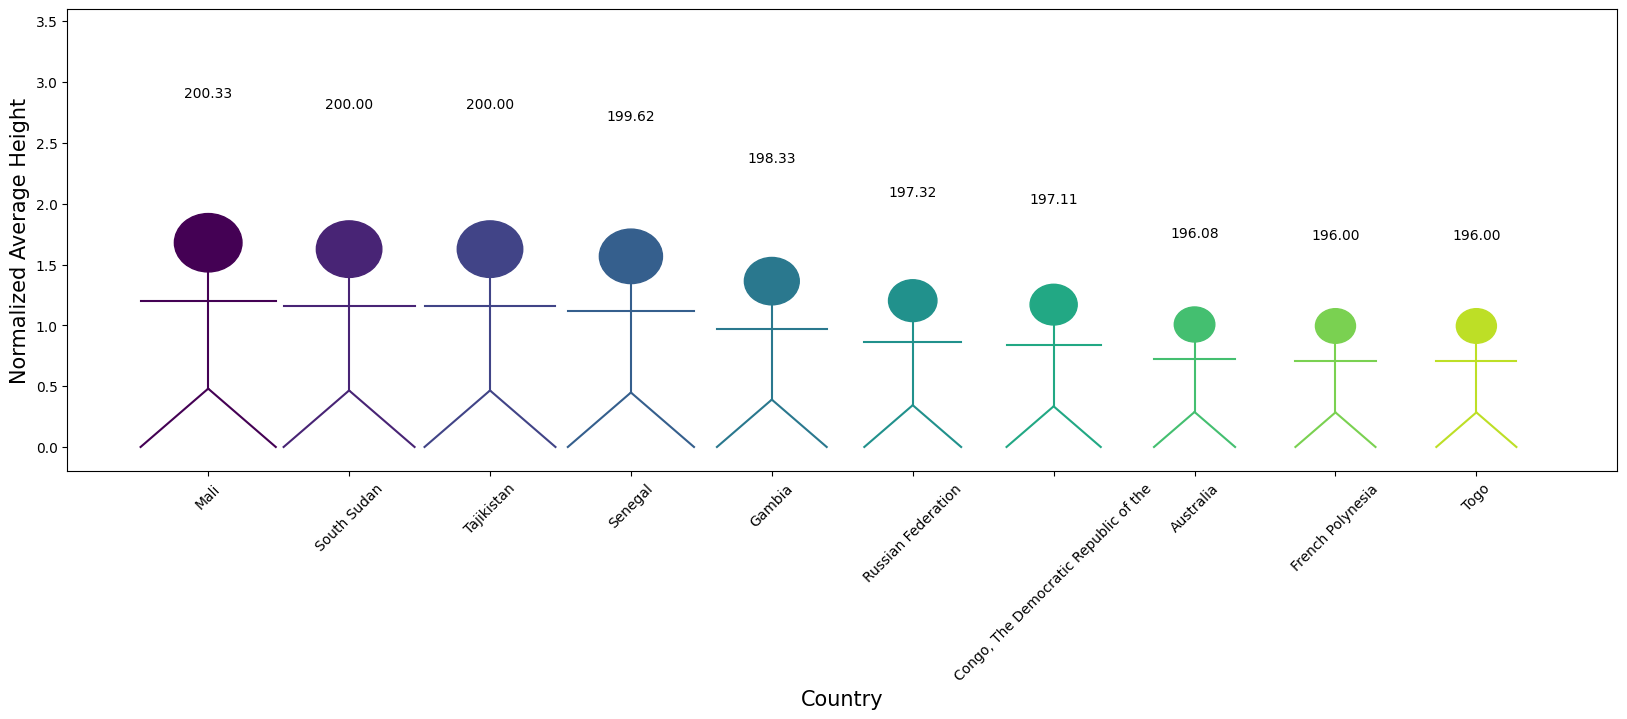

In [42]:
import matplotlib.cm as cm

# First, we will need to calculate the average heights for each country
average_heights = players.groupby('country_code')['height'].mean()

# Then, select the 10 countries with the highest average player height
selected_countries_codes = average_heights.nlargest(10).index

# Convert country codes to country names
selected_countries_names = [get_country_name(code) for code in selected_countries_codes]

# Get the average heights for these countries
selected_heights = average_heights.loc[selected_countries_codes]

# Normalize the heights for visualization, subtract the minimum and add a small constant to exaggerate differences
normalized_heights = (selected_heights - selected_heights.min() + 6.3) / (selected_heights.max() - selected_heights.min() + 0.1)

def draw_stick_figure(ax, height, x, color, actual_height):
    # Draw the body
    ax.plot([x, x], [height * 0.2, height * 0.6], color=color)

    # Draw the legs
    ax.plot([x-height * 0.2, x], [0, height * 0.2], color=color)
    ax.plot([x+height * 0.2, x], [0, height * 0.2], color=color)

    # Draw the arms
    ax.plot([x-height * 0.2, x+height * 0.2], [height * 0.5, height * 0.5], color=color)

    # Draw the head
    head_radius = height * 0.1
    ax.add_artist(plt.Circle((x, height * 0.7), head_radius, color=color))
    
    # Add the actual height as text above the head
    ax.text(x, height*1.2, f'{actual_height:.2f}', ha='center')

# Create a new figure with increased width
fig, ax = plt.subplots(figsize=(20, 6))

# Define a colormap
cmap = cm.get_cmap('viridis')

# Draw a stick figure for each country
for i, (country, height, actual_height) in enumerate(zip(selected_countries_names, normalized_heights, selected_heights)):
    # Use the colormap to get a color for this country based on the height
    color = cmap(i / len(selected_countries_names))
    draw_stick_figure(ax, height, i, color, actual_height)

# Set y-limits to include the heads and the text
ax.set_ylim(-0.2, max(normalized_heights)*1.5)

# Set x-limits to include all figures
ax.set_xlim(-1, len(selected_countries_names))

# Set x-ticks and labels to the country names
ax.set_xticks(np.arange(len(selected_countries_names)))
ax.set_xticklabels(selected_countries_names, rotation=45)

# Set labels for x-axis and y-axis
ax.set_xlabel('Country', fontsize=15)
ax.set_ylabel('Normalized Average Height', fontsize=15)

# Show the plot
plt.show()

# Player Physical Characteristics and Ranking

<div style="border-radius:10px;
            border : #101820 solid;
            background-color:#101820;
            letter-spacing:0.5px;
            text-align: center">

<h2 style="padding: 10px;
           color:#99F443;
           text-align:center;
           font-family: Cursive;
           font-size:180%;">
Exploring Player Physical Characteristics and Ranking
</h2>

<p style="padding: 10px;
           color:#FEE715;
           text-align:center;
           line-height:1.5;
           font-family: Cursive;
           font-size:140%;">
In this section, we dive deeper into the physical characteristics and ranking of the volleyball players in our dataset. We will be creating boxplots to visualize the distribution of the players' height, weight, and ranking. This will give us a better understanding of the physical traits that are common among these athletes and their global ranking.
</p>

</div>

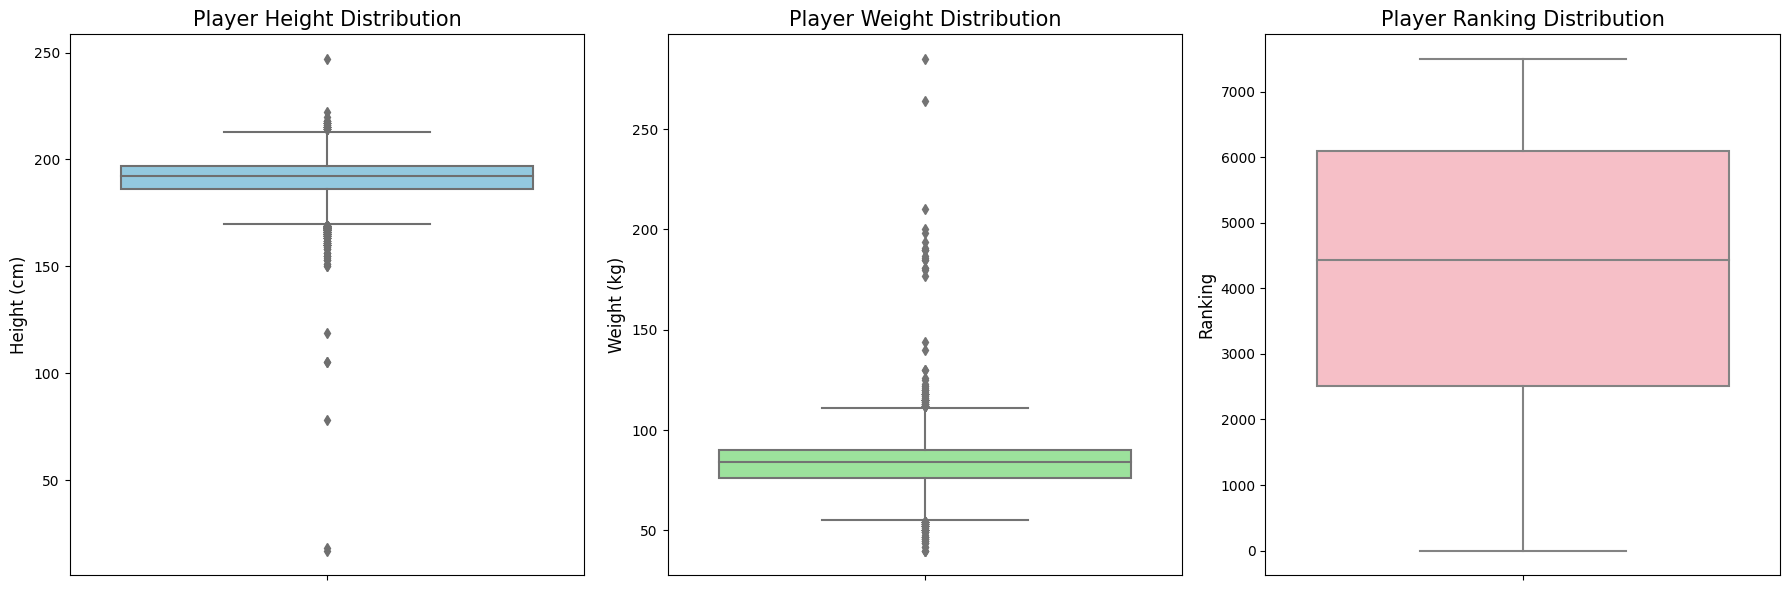

In [30]:
# Now, let's start exploring the data

# Create a new figure
plt.figure(figsize=(18, 6))

# Subplot 1 for Height
plt.subplot(1, 3, 1)
sns.boxplot(data=players, y='height', color='skyblue')
plt.title('Player Height Distribution', fontsize=15)
plt.ylabel('Height (cm)', fontsize=12)

# Subplot 2 for Weight
plt.subplot(1, 3, 2)
sns.boxplot(data=players, y='weight', color='lightgreen')
plt.title('Player Weight Distribution', fontsize=15)
plt.ylabel('Weight (kg)', fontsize=12)

# Subplot 3 for Ranking
plt.subplot(1, 3, 3)
sns.boxplot(data=players, y='ranking', color='lightpink')
plt.title('Player Ranking Distribution', fontsize=15)
plt.ylabel('Ranking', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

# Position Distribution Among Players

<div style="border-radius:10px;
            border : #101820 solid;
            background-color:#101820;
            letter-spacing:0.5px;
            text-align: center">

<h2 style="padding: 10px;
           color:#99F443;
           text-align:center;
           font-family: Cursive;
           font-size:180%;">
Position Distribution Among Players
</h2>

<p style="padding: 10px;
           color:#FEE715;
           text-align:center;
           line-height:1.5;
           font-family: Cursive;
           font-size:140%;">
In this segment, we shift our focus to understand the distribution of players across different positions. 
</p>

<p style="padding: 10px;
           color:#FEE715;
           text-align:center;
           line-height:1.5;
           font-family: Cursive;
           font-size:140%;">
We create a vibrant pie chart to visualize the percentage share of each position in our dataset. The 'explode' feature in the pie chart emphasizes all positions equally. This visualization gives us a clear picture of the most and least common positions among the volleyball players.
</p>

</div>

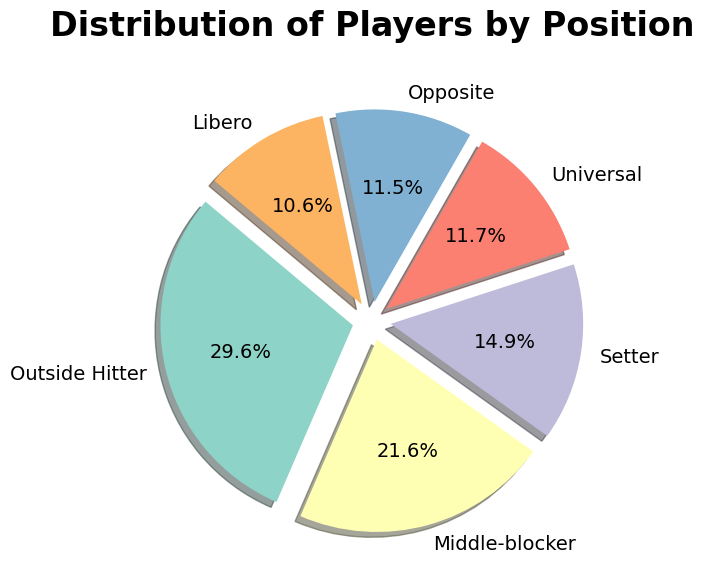

In [31]:
# Count of players by position
position_count = players['position'].value_counts()

# Create pie chart
fig, ax = plt.subplots(figsize=(6, 6))

# Define colors
colors = sns.color_palette("Set3", len(position_count.index))

# Create pie chart
explode = [0.1]*len(position_count)  # explode all sections
patches, texts, autotexts = ax.pie(position_count.values, labels=position_count.index, autopct='%1.1f%%', 
                                   startangle=140, colors=colors, explode=explode, shadow=True)

# Add title
plt.title('Distribution of Players by Position', fontsize=24, fontweight='bold', y=1.1)

# Increase the size of the labels and percentages
for text in texts+autotexts:
    text.set_fontsize(14)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Identifying Top Countries in Volleyball

<div style="border-radius:10px;
            border : #101820 solid;
            background-color:#101820;
            letter-spacing:0.5px;
            text-align: center">

<h2 style="padding: 10px;
           color:#99F443;
           text-align:center;
           font-family: Cursive;
           font-size:180%;">
Identifying Top Countries in Volleyball
</h2>

<p style="padding: 10px;
           color:#FEE715;
           text-align:center;
           line-height:1.5;
           font-family: Cursive;
           font-size:140%;">
In this section, we aim to identify the countries that have contributed the most number of players in our dataset. 
</p>

<p style="padding: 10px;
           color:#FEE715;
           text-align:center;
           line-height:1.5;
           font-family: Cursive;
           font-size:140%;">
We begin by converting the country codes to country names for better readability. Next, we calculate the top 10 countries with the most players. Finally, we visualize these statistics using a horizontal bar plot, where the y-axis represents the countries and the x-axis represents the number of players. This plot will provide us with a clear understanding of the countries that dominate in terms of player numbers in our dataset.
</p>

</div>

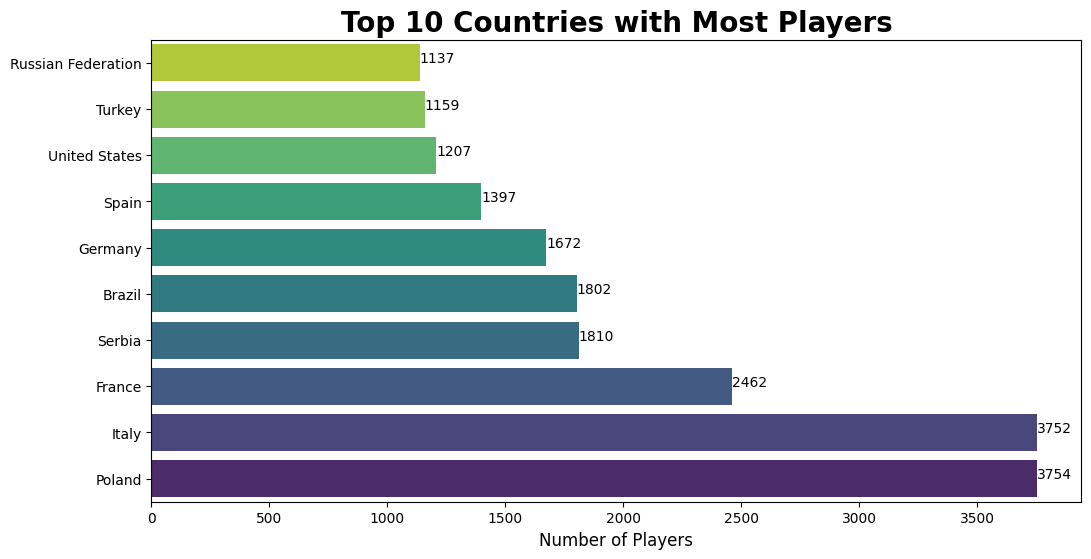

In [32]:
# Convert country codes to names
players['country_name'] = players['country_code'].apply(lambda x: get_country_name(x))

# Top 10 countries with most players
top_countries = players['country_name'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 6))

# Using seaborn's barplot function
sns.barplot(y=top_countries.index, x=top_countries.values, palette="viridis", orient='h')

# Adding and formatting title
plt.title('Top 10 Countries with Most Players', fontsize=20, fontweight='bold')

# Labeling axes
plt.xlabel('Number of Players', fontsize=12)
plt.ylabel('')

# Adding text labels for each bar's value
for index, value in enumerate(top_countries.values):
    plt.text(value, index, str(value))

# Inverting the y-axis to have the country with the most players at the top
plt.gca().invert_yaxis()

plt.show()

# Distribution of Matches and Tournaments

<div style="border-radius:10px;
            border : #101820 solid;
            background-color:#101820;
            letter-spacing:0.5px;
            text-align: center">

<h2 style="padding: 10px;
           color:#00FFFF;
           text-align:center;
           font-family: Cursive;
           font-size:180%;">
Analyzing the Distribution of Matches and Tournaments
</h2>

<p style="padding: 10px;
           color:#FEE715;
           text-align:center;
           line-height:1.5;
           font-family: Cursive;
           font-size:140%;">
In this section, we will be examining the distribution of the number of matches and tournaments among the teams in our dataset. 
</p>

<p style="padding: 10px;
           color:#FEE715;
           text-align:center;
           line-height:1.5;
           font-family: Cursive;
           font-size:140%;">
We will generate histograms and boxplots for both 'Number of Matches' and 'Number of Tournaments'. Histograms provide a visual interpretation of numerical data by indicating the number of data points that lie within a range of values, known as a bin. Boxplots, on the other hand, provide a summary of the data's distribution, including the median, quartiles, and potential outliers.
</p>

<p style="padding: 10px;
           color:#FEE715;
           text-align:center;
           line-height:1.5;
           font-family: Cursive;
           font-size:140%;">
These visualizations will help us understand the data's distribution and variability, which are key aspects in statistical analysis and data science.
</p>

</div>

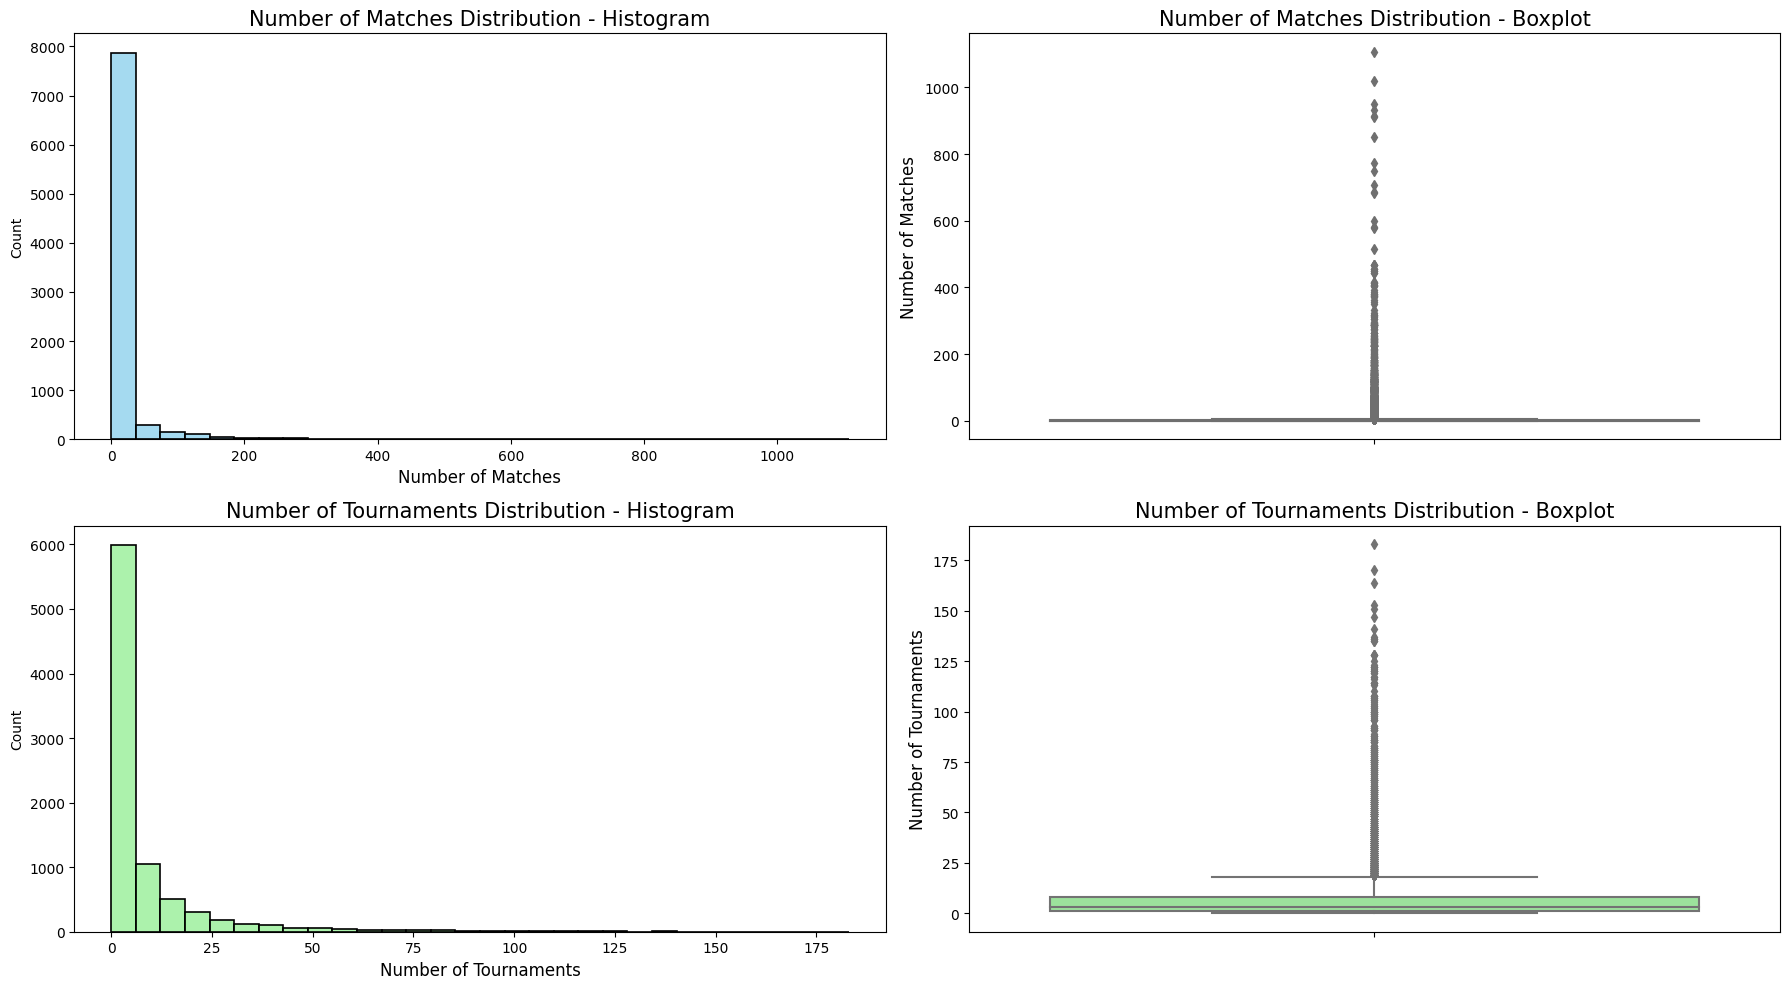

In [33]:
# Create a new figure
plt.figure(figsize=(18, 10))

# Subplot 1 for Number of Matches - Histogram
plt.subplot(2, 2, 1)
sns.histplot(data=teams, x='n_matches', bins=30, color='skyblue', edgecolor='black', linewidth=1.2)
plt.title('Number of Matches Distribution - Histogram', fontsize=15)
plt.xlabel('Number of Matches', fontsize=12)

# Subplot 2 for Number of Matches - Boxplot
plt.subplot(2, 2, 2)
sns.boxplot(data=teams, y='n_matches', color='skyblue')
plt.title('Number of Matches Distribution - Boxplot', fontsize=15)
plt.ylabel('Number of Matches', fontsize=12)

# Subplot 3 for Number of Tournaments - Histogram
plt.subplot(2, 2, 3)
sns.histplot(data=teams, x='n_tournaments', bins=30, color='lightgreen', edgecolor='black', linewidth=1.2)
plt.title('Number of Tournaments Distribution - Histogram', fontsize=15)
plt.xlabel('Number of Tournaments', fontsize=12)

# Subplot 4 for Number of Tournaments - Boxplot
plt.subplot(2, 2, 4)
sns.boxplot(data=teams, y='n_tournaments', color='lightgreen')
plt.title('Number of Tournaments Distribution - Boxplot', fontsize=15)
plt.ylabel('Number of Tournaments', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

# Foundation Years of Teams

<div style="border-radius:10px;
            border : #101820 solid;
            background-color:#101820;
            letter-spacing:0.5px;
            text-align: center">

<h2 style="padding: 10px;
           color:#00FFFF;
           text-align:center;
           font-family: Cursive;
           font-size:180%;">
Exploring the Foundation Years of Teams
</h2>

<p style="padding: 10px;
           color:#FEE715;
           text-align:center;
           line-height:1.5;
           font-family: Cursive;
           font-size:140%;">
In this section, we focus on investigating the distribution of the years when the teams in our dataset were founded. This will provide us with insights into the historical development of volleyball teams over the years.
</p>

<p style="padding: 10px;
           color:#FEE715;
           text-align:center;
           line-height:1.5;
           font-family: Cursive;
           font-size:140%;">
We begin by converting the 'founded' column to numeric data, which will enable us to perform statistical operations on it. Then we will create a histogram to visualize the distribution of team founding years. The X-axis represents the 'Year', and the Y-axis represents the 'Count' of teams founded in each year. The histogram's bins (the bars in a histogram) are ranges of years, and the height of a bin corresponds to the frequency (the number of teams) of data points that fall into its range.
</p>

<p style="padding: 10px;
           color:#FEE715;
           text-align:center;
           line-height:1.5;
           font-family: Cursive;
           font-size:140%;">
This analysis could potentially reveal interesting trends and patterns related to the growth and evolution of volleyball as a competitive sport.
</p>

</div>


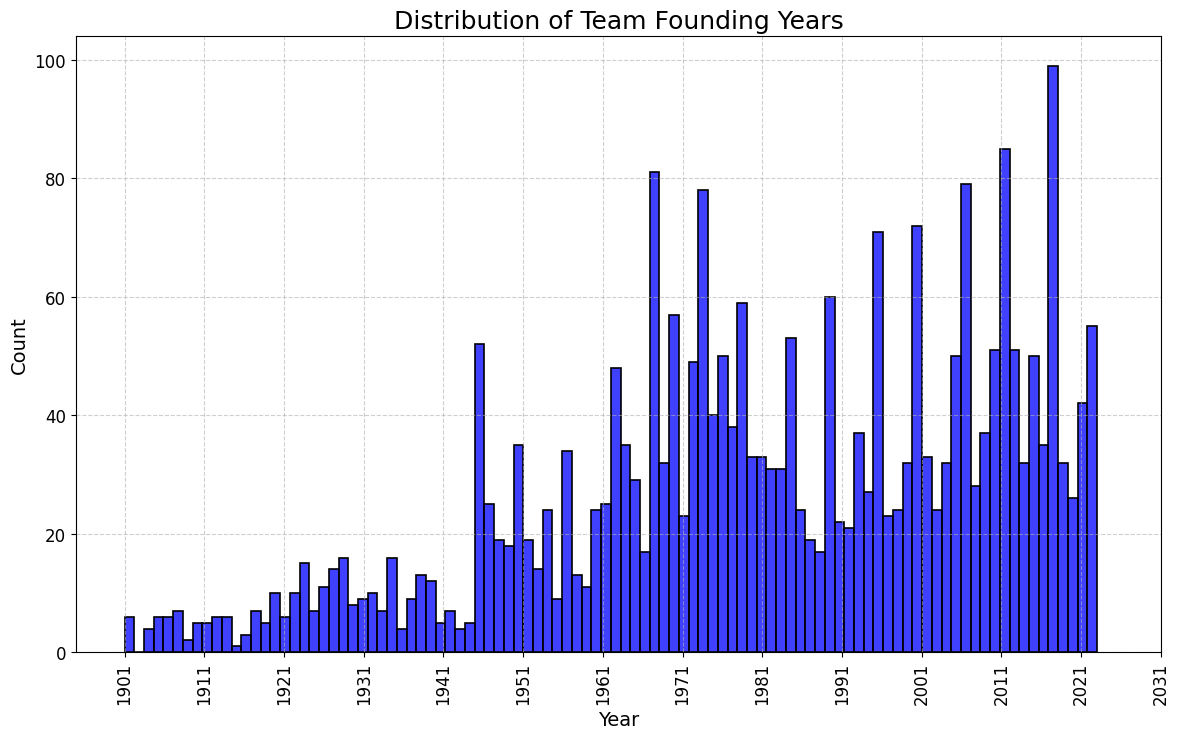

In [34]:
# Convert the 'founded' column to numeric
teams['founded'] = pd.to_numeric(teams['founded'], errors='coerce')

# Distribution of team founding years
plt.figure(figsize=(14, 8))

# Plot data
sns.histplot(teams['founded'], bins=100, color='blue', edgecolor='black', linewidth=1.2)

# Define x-axis labels
x_ticks = np.arange(teams['founded'].min(), teams['founded'].max()+10, 10)
plt.xticks(x_ticks, rotation=90)

# Set plot title and labels with larger font sizes
plt.title('Distribution of Team Founding Years', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Increase the font size of the x and y ticks labels
plt.tick_params(labelsize=12)

# Display grid
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()